# DDMS data

TODOS
1. Medical term (huiying/Jia mao)
   Understand the difference between Calc and Mass
   which image (CC,MLO) will be used in training?
   what is relationship between left cc and right cc?
   
2. CSV Data analysis (Jia Mao)
   Data distribution
   Useful fields

3. Extract DICOM to image(Bing)
   a) Place it under different folder
   b) visualize the origin and segmentation and merge it in one image

4. Image normalization  (Bing)
   a) resize
    
5. ResNet Model

6. UNet Model

7. UI design


# Background Introduction

# Analyze Sample 

In [29]:
import pandas as pd
df=pd.read_csv('mass_case_description_train_set.csv')

In [164]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [30]:
df.head()

,patient_id,breast_density,side,view,abn_num,mass_shape,mass_margins,assessment,pathology,subtlety,od_img_path,od_crop_path,mask_path
0,P_00001,3,LEFT,CC,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
1,P_00001,3,LEFT,MLO,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
2,P_00004,3,LEFT,CC,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
3,P_00004,3,LEFT,MLO,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp
4,P_00004,3,RIGHT,MLO,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp


In [32]:
df['id'] = df['patient_id'] +'_'+df['side'] +'_'+df['view']
df.head()

,patient_id,breast_density,side,view,abn_num,mass_shape,mass_margins,assessment,pathology,subtlety,od_img_path,od_crop_path,mask_path,id
0,P_00001,3,LEFT,CC,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,P_00001_LEFT_CC
1,P_00001,3,LEFT,MLO,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,P_00001_LEFT_MLO
2,P_00004,3,LEFT,CC,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,P_00004_LEFT_CC
3,P_00004,3,LEFT,MLO,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,P_00004_LEFT_MLO
4,P_00004,3,RIGHT,MLO,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass_Training_full_mammogram_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,Mass-Training_ROI-mask_and_crpped_images.jnlp,P_00004_RIGHT_MLO


## General Analysis

In [54]:
df.describe()

,breast_density,abn_num,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [105]:
print("patient_id")
print(df['patient_id'].describe())

patient_id
count        1318
unique        691
top       P_00106
freq           14
Name: patient_id, dtype: object


根据*patient_id*来看， dataset总共包含691名patient的info，其中P_00106号patient的图像最多，有14条数据。


### Analyzing Quantitative Data

dataset中 *breast_density*，*abn_num*，*assessment*，*subtlety* 的值都是0到6之间的整数，所以猜测是标注分类或者等级，而不是诊断或测量值的数据。而且根据下面的柱状图和关系图来看，这些数据之类没有什么明显的关联。

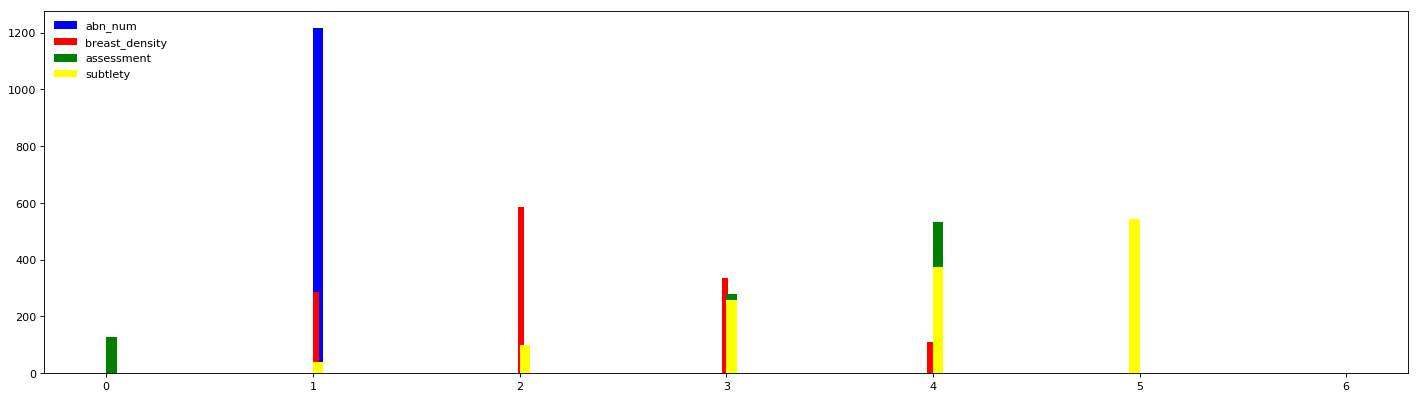

In [93]:
plt.figure(figsize=(22,6), dpi=80)
plt.hist(df['abn_num'],100, color="blue", label='abn_num')
plt.hist(df['breast_density'],100 , color="red", label='breast_density')
plt.hist(df['assessment'],100, color="green", label='assessment')
plt.hist(df['subtlety'],100, color="yellow", label='subtlety')
plt.legend(loc='upper left', frameon=False)
plt.show()

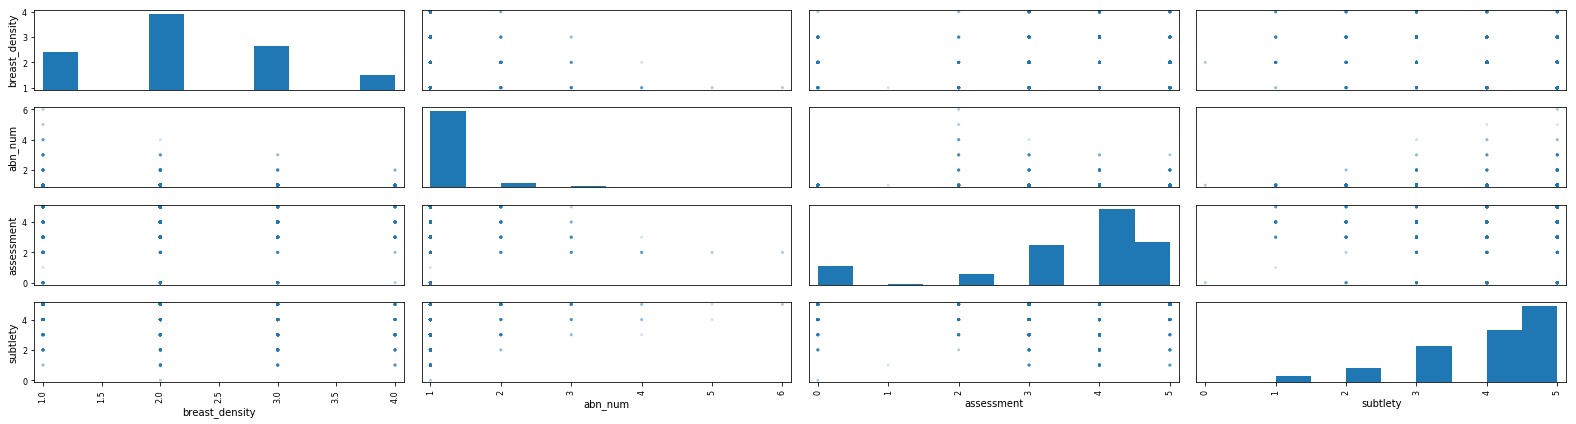

In [101]:
scatter_matrix(df, alpha=0.2, figsize=(22,6))
plt.tight_layout()

### Analyzing Qualitative Data

除了定量数据之外，定性的数据主要有下面这些：*view*，*mass_shape*，*mass_margins*，*pathology*。 其中*view*的分类比较均匀，*MLO* 和 *CC* 几乎各占一半。*mass_shape* 和 *mass_margins*的类别比较多，分别是15和18个，考虑到数据量总共只有1318条，我们是否还要根据这两项进一步分类？

下面我主要是先把数据根据病理结果（*pathology*）来分类分析。

In [222]:
print("view：")
print(df['view'].describe())
print("")
print("mass_shape：")
print(df['mass_shape'].describe())
print("")
print("mass_margins：")
print(df['mass_margins'].describe())
print("")
print("pathology：")
print(df['pathology'].describe())

view：
count     1318
unique       2
top        MLO
freq       711
Name: view, dtype: object

mass_shape：
count          1314
unique           18
top       IRREGULAR
freq            351
Name: mass_shape, dtype: object

mass_margins：
count              1275
unique               15
top       CIRCUMSCRIBED
freq                305
Name: mass_margins, dtype: object

pathology：
count          1318
unique            3
top       MALIGNANT
freq            637
Name: pathology, dtype: object


In [223]:
df['pathology'].value_counts()

MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: pathology, dtype: int64

在总共1318条数据中，*MALIGNANT*的占了近一半，其次是*BENIGN*，而*BENIGN_WITHOUT_CALLBACK*只有一百多条。

## Group by *pathology*

In [73]:
analyze_df= df.loc[:, 'patient_id':'subtlety']
analyze_df.head()

,patient_id,breast_density,side,view,abn_num,mass_shape,mass_margins,assessment,pathology,subtlety
0,P_00001,3,LEFT,CC,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
1,P_00001,3,LEFT,MLO,1,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
2,P_00004,3,LEFT,CC,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
3,P_00004,3,LEFT,MLO,1,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
4,P_00004,3,RIGHT,MLO,1,OVAL,CIRCUMSCRIBED,4,BENIGN,5


### Analyzing Quantitative Data by Groups

首先来分类分析那4个定量的数据：*breast_density*，*abn_num*，*assessment*，*subtlety*。 我把它们按病理结果（*BENIGN*，*BENIGN_WITHOUT_CALLBACK*，*MALIGNANT*）分类后再分别画出了关系图，但仍然看不出有明显的相关性，而且数据分布情况和之前没做分类的时候类似。

唯有*assessment*的数据分布与分类前比较，有较大变化，所以下面会重点分析*assessment*。

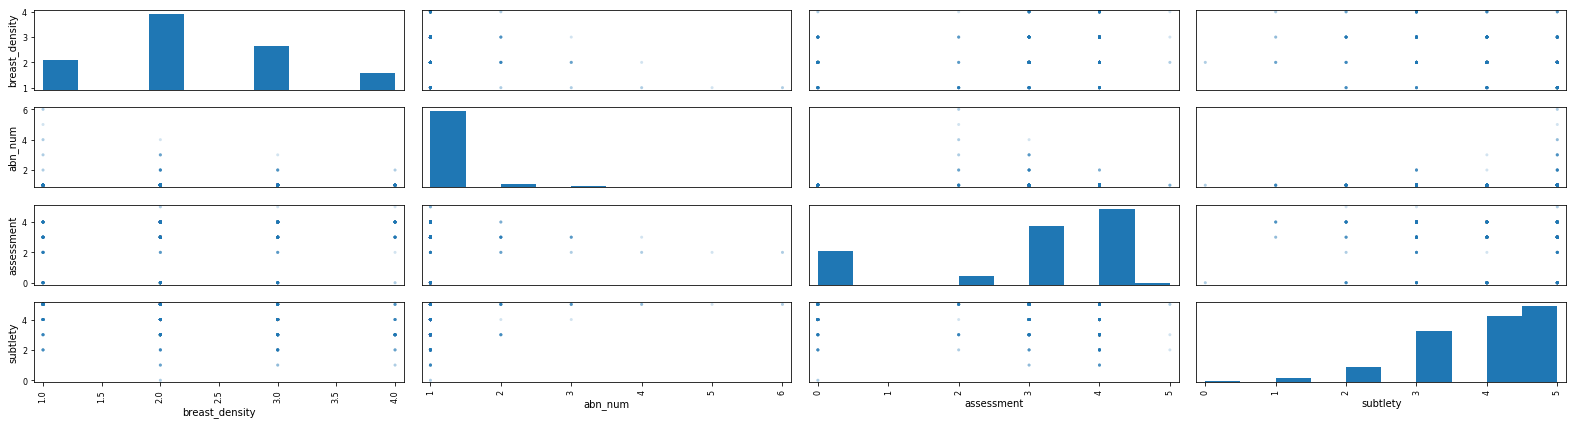

In [114]:
df_BENIGN = analyze_df[analyze_df['pathology'] == "BENIGN"]
scatter_matrix(df_BENIGN, alpha=0.2, figsize=(22,6))
plt.tight_layout()

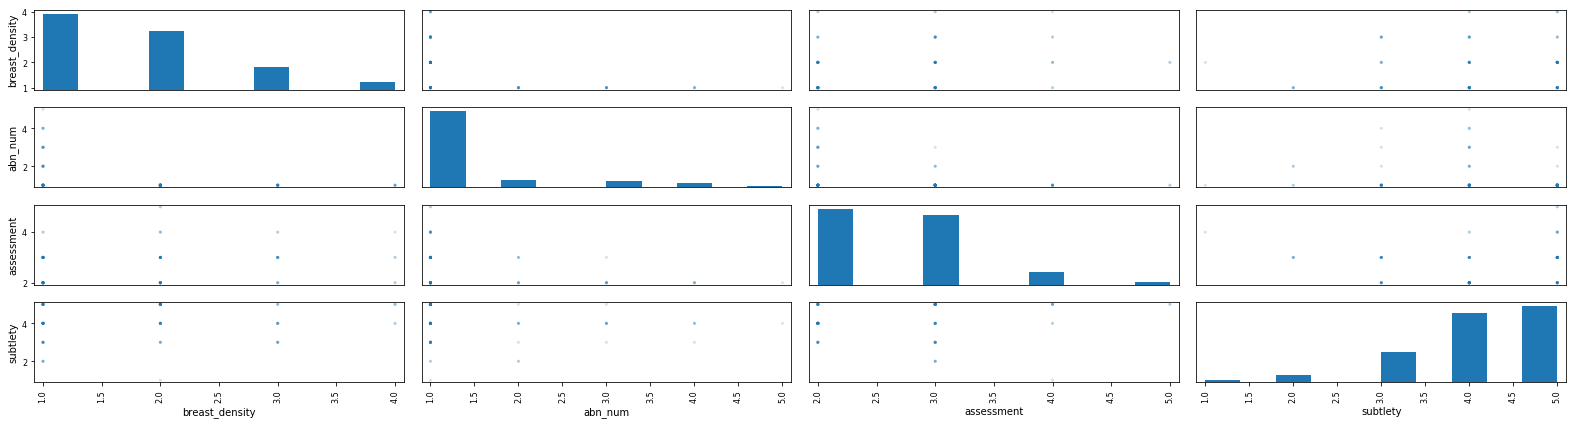

In [116]:
df_BENIGN_WITHOUT_CALLBACK = analyze_df[analyze_df['pathology'] == "BENIGN_WITHOUT_CALLBACK"]
scatter_matrix(df_BENIGN_WITHOUT_CALLBACK, alpha=0.2, figsize=(22,6))
plt.tight_layout()

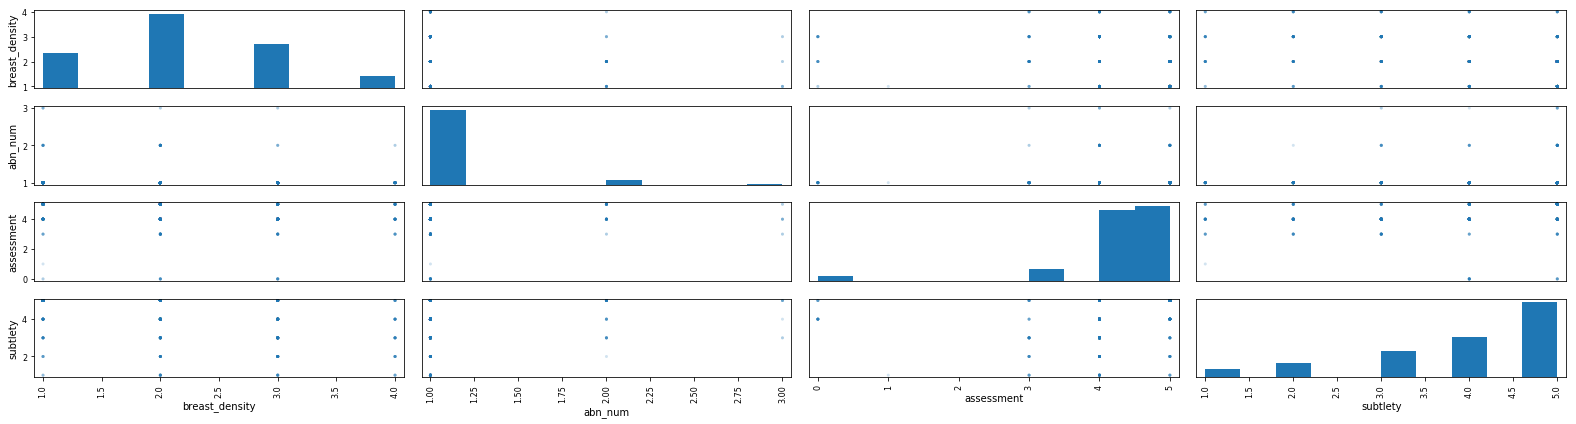

In [117]:
df_MALIGNANT = analyze_df[analyze_df['pathology'] == "MALIGNANT"]
scatter_matrix(df_MALIGNANT, alpha=0.2, figsize=(22,6))
plt.tight_layout()

In [193]:
BENIGN_counts = df_BENIGN['assessment'].value_counts()
BENIGN_WITHOUT_CALLBACK_counts = df_BENIGN_WITHOUT_CALLBACK['assessment'].value_counts()
MALIGNANT_counts = df_MALIGNANT['assessment'].value_counts()


In [182]:

merge_count =pd.DataFrame({"BENIGN_counts": BENIGN_counts, "BENIGN_WITHOUT_CALLBACK_counts": BENIGN_WITHOUT_CALLBACK_counts, "MALIGNANT_counts": MALIGNANT_counts}).reset_index()
merge_count = merge_count.fillna(0)
pie_count_label = merge_count["index"]
pie_BENIGN_counts= merge_count["BENIGN_counts"]
pie_BENIGN_WITHOUT_CALLBACK_counts= merge_count["BENIGN_WITHOUT_CALLBACK_counts"]
pie_MALIGNANT_counts= merge_count["MALIGNANT_counts"]

In [196]:
print("Number of each assessment type according to pathology:")
merge_count

Number of each assessment type according to pathology:


,index,BENIGN_WITHOUT_CALLBACK_counts,BENIGN_counts,MALIGNANT_counts
0,0,0.0,110.0,19.0
1,1,0.0,0.0,1.0
2,2,49.0,28.0,0.0
3,3,45.0,189.0,45.0
4,4,8.0,246.0,279.0
5,5,2.0,4.0,293.0


BENIGN: assessment


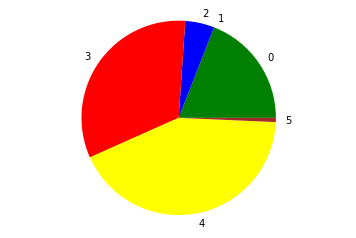

BENIGN_WITHOUT_CALLBACK: assessment


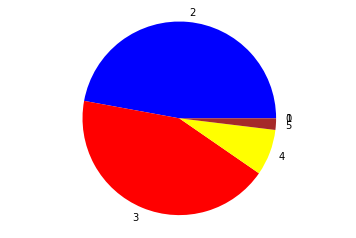

MALIGNANT: assessment


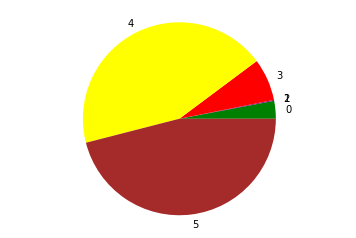

In [197]:
print("BENIGN: assessment")
plt.pie(pie_BENIGN_counts, labels=pie_count_label, colors=['green', 'purple','blue', 'red', 'yellow', 'brown'])
plt.axis('equal')
plt.show()

print("BENIGN_WITHOUT_CALLBACK: assessment")
plt.pie(pie_BENIGN_WITHOUT_CALLBACK_counts, labels=pie_count_label, colors=['green', 'purple','blue', 'red', 'yellow', 'brown'])
plt.axis('equal')
plt.show()

print("MALIGNANT: assessment")
plt.pie(pie_MALIGNANT_counts, labels=pie_count_label, colors=['green', 'purple','blue', 'red', 'yellow', 'brown'])
plt.axis('equal')
plt.show()

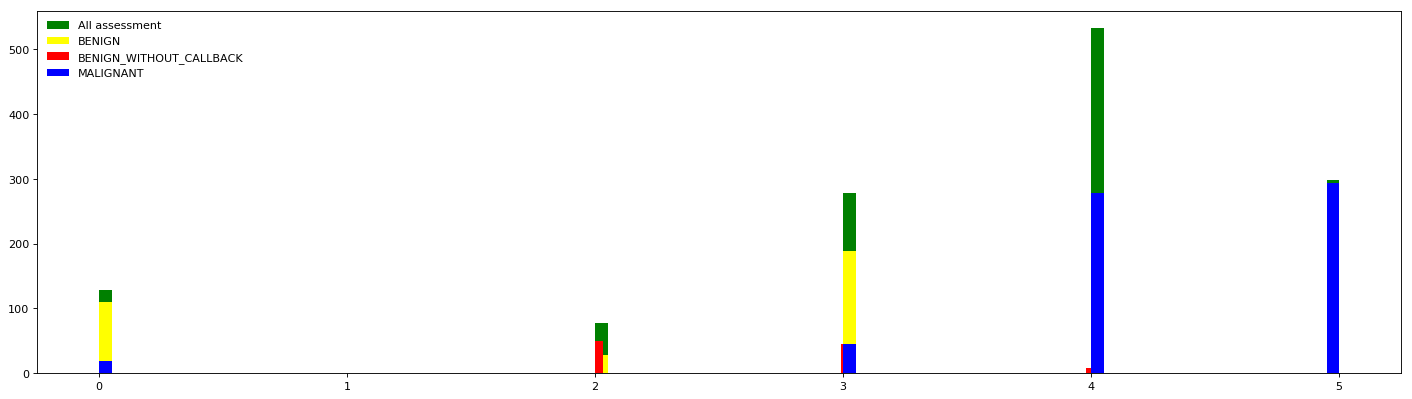

In [141]:
plt.figure(figsize=(22,6), dpi=80)
plt.hist(df['assessment'],100, color="green", label='All assessment')
plt.hist(df_BENIGN['assessment'],100, color="yellow", label='BENIGN')
plt.hist(df_BENIGN_WITHOUT_CALLBACK['assessment'],100, color="red", label='BENIGN_WITHOUT_CALLBACK')
plt.hist(df_MALIGNANT['assessment'],100, color="blue", label='MALIGNANT')
plt.legend(loc='upper left', frameon=False)
plt.show()

关于assessment的分析总结：

* 当*pathology* 为BENIGN_WITHOUT_CALLBACK时，assessment主要集中在2和3
* 当*pathology* 为BENIGN时，assessment主要集中在0，3和4
* 当*pathology* 为MALIGNANT时，assessment主要集中在4和5

### Analyzing Qualitative Data by Groups

In [220]:
bypathology = analyze_df.groupby('pathology')
print("view:")
print(bypathology['view'].describe())
print("")
print("mass_shape:")
print(bypathology['mass_shape'].describe())
print("")
print("mass_margins:")
print(bypathology['mass_margins'].describe())

view:
                        count unique  top freq
pathology                                     
BENIGN                    577      2  MLO  304
BENIGN_WITHOUT_CALLBACK   104      2  MLO   66
MALIGNANT                 637      2  MLO  341

mass_shape:
                        count unique         top freq
pathology                                            
BENIGN                    575     12        OVAL  220
BENIGN_WITHOUT_CALLBACK   104     10  LYMPH_NODE   26
MALIGNANT                 635     11   IRREGULAR  287

mass_margins:
                        count unique            top freq
pathology                                               
BENIGN                    570     11  CIRCUMSCRIBED  226
BENIGN_WITHOUT_CALLBACK    77      5  CIRCUMSCRIBED   47
MALIGNANT                 628     14     SPICULATED  260


*view* 在三个*pathology* 类别中还是基本和原先的分布保持一致。所以我们主要来分析*mass_shape* 和*mass_margins*。 

*mass_shape*原先有18个不同的值，数量最多的是*IRREGULAR*，有351个。在*MALIGNANT* 组中，*IRREGULAR*仍然是主要的*mass_shape*， 但是 *BENIGN* 和 *BENIGN_WITHOUT_CALLBACK* 的组中，*OVAL* 和 *LYMPH_NODE* 却是数量最多的。

*mass_margins*原先有15个不同的值，数量最多的是*CIRCUMSCRIBED*，有305个。在*BENIGN* 和 *BENIGN_WITHOUT_CALLBACK*组中，*CIRCUMSCRIBED*仍然占主导，但是*MALIGNANT*组中，数量最多的却是*SPICULATED*。

In [200]:
BENIGN_counts1 = df_BENIGN['mass_shape'].value_counts()
BENIGN_WITHOUT_CALLBACK_counts1 = df_BENIGN_WITHOUT_CALLBACK['mass_shape'].value_counts()
MALIGNANT_counts1 = df_MALIGNANT['mass_shape'].value_counts()
mass_shape_count =pd.DataFrame({"BENIGN_counts": BENIGN_counts1, "BENIGN_WITHOUT_CALLBACK_counts": BENIGN_WITHOUT_CALLBACK_counts1, "MALIGNANT_counts": MALIGNANT_counts1}).reset_index()

print("Number of each assessment type according to pathology:")
mass_shape_count

Number of each assessment type according to pathology:


,index,BENIGN_WITHOUT_CALLBACK_counts,BENIGN_counts,MALIGNANT_counts
0,ARCHITECTURAL_DISTORTION,11.0,17.0,52.0
1,ASYMMETRIC_BREAST_TISSUE,12.0,NaN,8.0
2,FOCAL_ASYMMETRIC_DENSITY,7.0,7.0,5.0
3,IRREGULAR,9.0,55.0,287.0
4,IRREGULAR-ARCHITECTURAL_DISTORTION,NaN,2.0,43.0
5,IRREGULAR-FOCAL_ASYMMETRIC_DENSITY,NaN,2.0,NaN
6,LOBULATED,11.0,190.0,104.0
7,LOBULATED-ARCHITECTURAL_DISTORTION,NaN,NaN,2.0
8,LOBULATED-IRREGULAR,NaN,2.0,3.0
9,LOBULATED-LYMPH_NODE,3.0,NaN,NaN


In [208]:
mass_shape_count_BENIGN =mass_shape_count[['index', 'BENIGN_counts']]
mass_shape_count_BENIGN = mass_shape_count_BENIGN.dropna(axis=0, how='any') 
mass_shape_count_BENIGN_WITHOUT_CALLBACK = mass_shape_count[['index', 'BENIGN_WITHOUT_CALLBACK_counts']]
mass_shape_count_BENIGN_WITHOUT_CALLBACK= mass_shape_count_BENIGN_WITHOUT_CALLBACK.dropna(axis=0, how='any')
mass_shape_count_MALIGNANT = mass_shape_count[['index', 'MALIGNANT_counts']]
mass_shape_count_MALIGNANT = mass_shape_count_MALIGNANT.dropna(axis=0, how='any') 

BENIGN: mass_shape


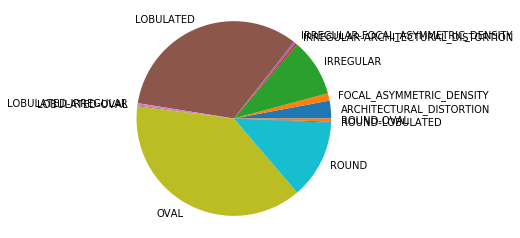

In [210]:
print("BENIGN: mass_shape")
plt.pie(mass_shape_count_BENIGN['BENIGN_counts'], labels=mass_shape_count_BENIGN['index'])
plt.axis('equal')
plt.show()

BENIGN_WITHOUT_CALLBACK: mass_shape


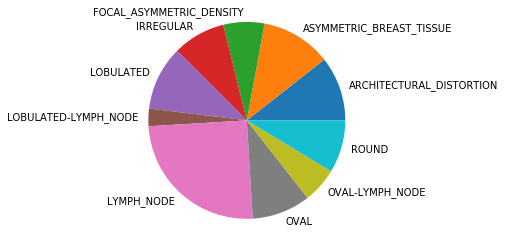

In [212]:
print("BENIGN_WITHOUT_CALLBACK: mass_shape")
plt.pie(mass_shape_count_BENIGN_WITHOUT_CALLBACK['BENIGN_WITHOUT_CALLBACK_counts'], labels=mass_shape_count_BENIGN_WITHOUT_CALLBACK['index'])
plt.axis('equal')
plt.show()

MALIGNANT: mass_shape


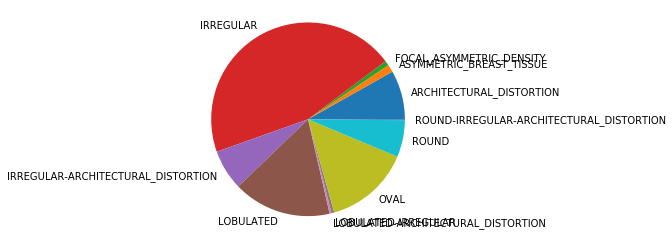

In [213]:
print("MALIGNANT: mass_shape")
plt.pie(mass_shape_count_MALIGNANT['MALIGNANT_counts'], labels=mass_shape_count_MALIGNANT['index'])
plt.axis('equal')
plt.show()

关于*mass_shape*的分析总结：在三个*pathology*组中，还是包含了很多不同的*mass_shape*值，考虑到数据的总量，不是很建议细分。不过可以考虑只使用出现频率较高的几个*mass_shape*值，如：*IRREGULAR*，*LOBULATED*，*OVAL*， *LYMPH_NODE* 等。  	


In [201]:
BENIGN_counts2 = df_BENIGN['mass_margins'].value_counts()
BENIGN_WITHOUT_CALLBACK_counts2 = df_BENIGN_WITHOUT_CALLBACK['mass_margins'].value_counts()
MALIGNANT_counts2 = df_MALIGNANT['mass_margins'].value_counts()
mass_margins_count =pd.DataFrame({"BENIGN_counts": BENIGN_counts2, "BENIGN_WITHOUT_CALLBACK_counts": BENIGN_WITHOUT_CALLBACK_counts2, "MALIGNANT_counts": MALIGNANT_counts2}).reset_index()

print("Number of each assessment type according to pathology:")
mass_margins_count

Number of each assessment type according to pathology:


,index,BENIGN_WITHOUT_CALLBACK_counts,BENIGN_counts,MALIGNANT_counts
0,CIRCUMSCRIBED,47.0,226.0,32.0
1,CIRCUMSCRIBED-ILL_DEFINED,NaN,14.0,13.0
2,CIRCUMSCRIBED-MICROLOBULATED,NaN,1.0,NaN
3,CIRCUMSCRIBED-OBSCURED,NaN,18.0,1.0
4,ILL_DEFINED,10.0,93.0,175.0
5,ILL_DEFINED-SPICULATED,NaN,2.0,23.0
6,MICROLOBULATED,6.0,33.0,69.0
7,MICROLOBULATED-ILL_DEFINED,NaN,2.0,1.0
8,MICROLOBULATED-ILL_DEFINED-SPICULATED,NaN,NaN,2.0
9,MICROLOBULATED-SPICULATED,NaN,NaN,2.0


In [214]:
mass_margins_count_BENIGN =mass_margins_count[['index', 'BENIGN_counts']]
mass_margins_count_BENIGN = mass_margins_count_BENIGN.dropna(axis=0, how='any') 
mass_margins_count_BENIGN_WITHOUT_CALLBACK = mass_margins_count[['index', 'BENIGN_WITHOUT_CALLBACK_counts']]
mass_margins_count_BENIGN_WITHOUT_CALLBACK= mass_margins_count_BENIGN_WITHOUT_CALLBACK.dropna(axis=0, how='any')
mass_margins_count_MALIGNANT = mass_margins_count[['index', 'MALIGNANT_counts']]
mass_margins_count_MALIGNANT = mass_margins_count_MALIGNANT.dropna(axis=0, how='any') 

BENIGN: mass_margins


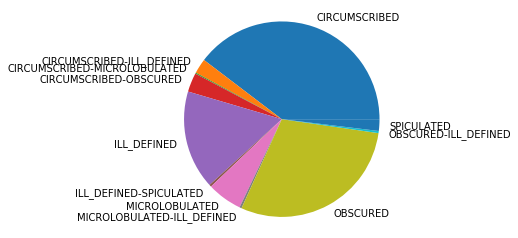

In [215]:
print("BENIGN: mass_margins")
plt.pie(mass_margins_count_BENIGN['BENIGN_counts'], labels=mass_margins_count_BENIGN['index'])
plt.axis('equal')
plt.show()

BENIGN_WITHOUT_CALLBACK: mass_margins


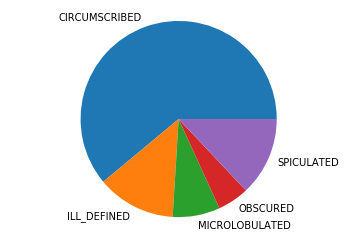

In [217]:
print("BENIGN_WITHOUT_CALLBACK: mass_margins")
plt.pie(mass_margins_count_BENIGN_WITHOUT_CALLBACK['BENIGN_WITHOUT_CALLBACK_counts'], labels=mass_margins_count_BENIGN_WITHOUT_CALLBACK['index'])
plt.axis('equal')
plt.show()

MALIGNANT: mass_margins


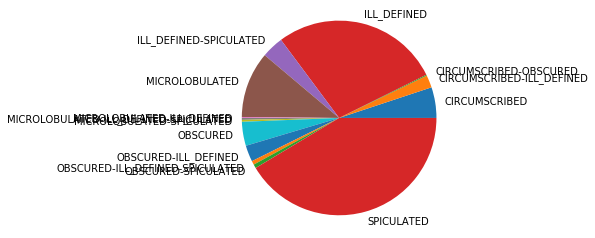

In [218]:
print("MALIGNANT: mass_margins")
plt.pie(mass_margins_count_MALIGNANT['MALIGNANT_counts'], labels=mass_margins_count_MALIGNANT['index'])
plt.axis('equal')
plt.show()

关于*mass_margins*的分析总结：和*mass_shape*的情况类似，在三个pathology组中，还是包含了很多不同的*mass_margins*值，但是我们可以重点关注几个出现频率较高的值：*CIRCUMSCRIBED*，*ILL_DEFINED*，*SPICULATED*等。特别值得注意的是，*CIRCUMSCRIBED*是整个*mass_margins*列中出现最多的值，并且在分组分析中，*CIRCUMSCRIBED*也是*BENIGN*和*BENIGN_WITHOUT_CALLBACK*组中频率最高的值，但是在*MALIGNANT*组，它的出现频率却降得很低。 

# Filter Data

In [3]:
filter_df=df[(df.view=='CC')&((df.side=='LEFT') | (df.side=='RIGHT'))]

In [4]:
id_class = dict(zip(filter_df.id, filter_df.pathology))
id_class

{'P_00001_LEFT_CC': 'MALIGNANT',
 'P_00004_LEFT_CC': 'BENIGN',
 'P_00009_RIGHT_CC': 'MALIGNANT',
 'P_00018_RIGHT_CC': 'BENIGN',
 'P_00021_LEFT_CC': 'BENIGN',
 'P_00021_RIGHT_CC': 'BENIGN',
 'P_00023_RIGHT_CC': 'MALIGNANT',
 'P_00026_LEFT_CC': 'BENIGN',
 'P_00027_RIGHT_CC': 'BENIGN',
 'P_00034_RIGHT_CC': 'MALIGNANT',
 'P_00039_RIGHT_CC': 'MALIGNANT',
 'P_00041_LEFT_CC': 'BENIGN_WITHOUT_CALLBACK',
 'P_00044_RIGHT_CC': 'BENIGN',
 'P_00045_LEFT_CC': 'MALIGNANT',
 'P_00051_LEFT_CC': 'MALIGNANT',
 'P_00055_LEFT_CC': 'BENIGN',
 'P_00057_RIGHT_CC': 'MALIGNANT',
 'P_00058_RIGHT_CC': 'MALIGNANT',
 'P_00059_LEFT_CC': 'MALIGNANT',
 'P_00061_RIGHT_CC': 'BENIGN',
 'P_00065_LEFT_CC': 'BENIGN',
 'P_00068_RIGHT_CC': 'MALIGNANT',
 'P_00074_RIGHT_CC': 'MALIGNANT',
 'P_00076_LEFT_CC': 'BENIGN',
 'P_00079_RIGHT_CC': 'MALIGNANT',
 'P_00080_RIGHT_CC': 'MALIGNANT',
 'P_00081_RIGHT_CC': 'BENIGN',
 'P_00086_RIGHT_CC': 'MALIGNANT',
 'P_00090_LEFT_CC': 'BENIGN',
 'P_00092_LEFT_CC': 'MALIGNANT',
 'P_00092_RIGHT_CC

# Install package

In [5]:
!pip install dicom
!pip install opencv-python


## DDMS data exploration

### Define function to convert from dicom to image 

In [6]:
import os
import dicom
import numpy as np
import cv2
import re

failcount=0
sucesscount=0
def dicom2img(dicom_file, img_file):

    # Extracting data from the mri file
    plan = dicom.read_file(dicom_file)
    #print(plan.pixel_array.shape)
    # fix different size issue
    d=plan.pixel_array.shape[0]
    if d>2000:
        amax = np.amax(plan.pixel_array)
        image_2d_scaled = plan.pixel_array / amax * 255.0
        cv2.imwrite(img_file, image_2d_scaled)

def preprocess_dicom(input_dir,output_dir):  
    global failcount
    global sucesscount
    failcount=0
    sucesscount=0
    for root, dirs, files in os.walk(input_dir):
        path = root.split(os.sep)
        for file in files:
            src_path=root+os.sep+file
            if os.path.isfile(src_path):
                try:
                    result = re.search('P_\d{5}_(LEFT|RIGHT)_CC', src_path)
                    
                    if result:
                        
                        # if (input_dir=='origin/x' or '000000.dcm' in src_path):
                        filename=result.group(0)
                        clazz=id_class.get(filename)
                        tgt_path=output_dir+os.sep+clazz
                        if not os.path.exists(tgt_path):
                            os.makedirs(tgt_path)
                        full_tgt_file_name=tgt_path+os.sep+filename+'.jpg'
                        dicom2img(src_path,full_tgt_file_name)
                    sucesscount+=1
                except Exception:
                    failcount+=1
                    #print('fail to convert this dicom',src_path)

In [7]:
str1='origin/y/DOI/Mass-Training_P_00241_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.13992534612203574730431474343939847203/1.3.6.1.4.1.9590.100.1.2.258350419612577688509150109583506305771/000000.dcm'

if '000000.dcm' in str1:
    print('yes')

yes


# Generate Input Image for classification

In [8]:
# traverse root directory, and list directories as dirs and files as files



In [9]:
if not os.path.exists('input/x'):
    os.makedirs('input/x')
if not os.path.exists('input/y'):
    os.makedirs('input/y')

In [10]:
preprocess_dicom('origin/x','input/x')

======verification start=====
None
origin/x/=
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01714_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01714_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.269931560011677205920554960732789014472/1.3.6.1.4.1.9590.100.1.2.348868297212093775021413390350222938098/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01714_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01606_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.207554610412444724724945317490720966379/1.3.6.1.4.1.9590.100.1.2.126755783111508380316432377851876372912/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01048_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.167046807012151503142635168531850465903/1.3.6.1.4.1.9590.100.1.2.115863008211651253636504014142369182288/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01134_RIGHT_CC'>
origin/x/DOI/

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00782_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00782_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.246987491212668308635069277622290652283/1.3.6.1.4.1.9590.100.1.2.182968415013050584706500148952370519925/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00782_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01035_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.309169397912188845709954016473321284590/1.3.6.1.4.1.9590.100.1.2.194014761511237421025886729180261985635/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00535_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00535_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.425545805510014408339069912323153757248/1.3.6.1.4.1.9590.100.1.2.6326146212137720929099055383856573953/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00535_LEFT_CC.jpg
======verification start=====
None
origin/x

======verification start=====
None
origin/x/DOI/Mass-Training_P_00363_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.92618661711482555439145527170809632544/1.3.6.1.4.1.9590.100.1.2.127414375612335850402983190211128956561/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01165_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01165_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.147497732811643902117342099303968587014/1.3.6.1.4.1.9590.100.1.2.202787438912571488218729343282971946429/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01165_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00440_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.55012842710335816232943325513141192678/1.3.6.1.4.1.9590.100.1.2.192996741813138389617212425101716524518/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01391_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01391_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.113059

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00110_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00110_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.185266796812277153020478340462707798772/1.3.6.1.4.1.9590.100.1.2.318795357011333161907603475760244333735/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00110_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01761_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01761_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.185980712212841852742105027931646036476/1.3.6.1.4.1.9590.100.1.2.94855395812079770126816595643794643222/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01761_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00958_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00958_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.263967019613062824539845287940403184498/1.3.6.1.4.1.9590.100.1.2.416588203912230930803733548970532654845/000000.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01120_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01120_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.111397208312704640220536756860949467939/1.3.6.1.4.1.9590.100.1.2.303338101913629925523849739983029373774/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01120_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00332_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00332_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.301281973710855822036202520890792601889/1.3.6.1.4.1.9590.100.1.2.276781632711164698606928383192931648072/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00332_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01621_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01621_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.304454455712662014730761012712174557866/1.3.6.1.4.1.9590.100.1.2.393540200811993411831560257320707365010/000000.

======verification start=====
None
origin/x/DOI/Mass-Training_P_00515_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.125904990912397393220358368070187110678/1.3.6.1.4.1.9590.100.1.2.17656049411860406917528541481620403085/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00431_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.205151279713393134238372758233526634188/1.3.6.1.4.1.9590.100.1.2.124590109813952150636321061402587017340/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01878_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01878_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408795217512049000601382158654104419551/1.3.6.1.4.1.9590.100.1.2.391822368011278016029379162891017489915/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01878_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01394_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.203090950910807969104175912311360010253/1.3.6.1.4.1.9590.100.1.2.4

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00319_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00319_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.209632843411472243118340281891119423302/1.3.6.1.4.1.9590.100.1.2.385048669110065366518659298952946874460/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00319_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00545_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.62601281511634429403968808300582652111/1.3.6.1.4.1.9590.100.1.2.142058700613010348526232451892410644043/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00961_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.252065467011550931920661293152052778706/1.3.6.1.4.1.9590.100.1.2.33118281113515373820462752283931435411/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01501_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.386010481711254635226673934481771981575/1.3.6.1.4.1.9590.100.1.2.42

======verification start=====
None
origin/x/DOI/Mass-Training_P_00021_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.175775778412639397630711440683592723498/1.3.6.1.4.1.9590.100.1.2.369287458813355648611939058220166307923/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01206_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.84796691012850669804412676330103000334/1.3.6.1.4.1.9590.100.1.2.210396893911234385024533119100226540488/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01225_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01225_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.229225099810277177524111937373596831728/1.3.6.1.4.1.9590.100.1.2.425698079412077502741643782591283336956/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01225_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00517_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.232432814411181634341973841232095485946/1.3.6.1.4.1.9590.100.1.2.3

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01805_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01805_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.418490032511140443632565180693717136682/1.3.6.1.4.1.9590.100.1.2.192858107413072871142494695763905774079/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01805_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00396_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00396_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.139737817413573460617004896332893320720/1.3.6.1.4.1.9590.100.1.2.99384845412796395014256477491120965729/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00396_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01070_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01070_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.156336053311362302406079561010520247941/1.3.6.1.4.1.9590.100.1.2.81709986712519381829832213810104708854/000000.dcm
tet

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00332_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00332_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.377226232312121729826764967840053589045/1.3.6.1.4.1.9590.100.1.2.418457498011014875313768610940282872675/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00332_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01604_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01604_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.203729130811658201203960508261487767744/1.3.6.1.4.1.9590.100.1.2.244372785111268123236187043051295644391/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01604_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01088_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01088_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.117053176411179875409923214302068033971/1.3.6.1.4.1.9590.100.1.2.99652509111900105331025325421855924911/000000.dcm
te

======verification start=====
None
origin/x/DOI/Mass-Training_P_00739_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.192305244812087333430483611192017834227/1.3.6.1.4.1.9590.100.1.2.370315874913495676207201903751794384276/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00190_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.230473664412437932214685154692399633299/1.3.6.1.4.1.9590.100.1.2.44010144711160704136767640560687663719/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01529_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01529_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.361291735312599076629310342673446573481/1.3.6.1.4.1.9590.100.1.2.247490147911533287729916340634162491946/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01529_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01671_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01671_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.288989

======verification start=====
None
origin/x/DOI/Mass-Training_P_00442_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.156156668311234487400742859863660127104/1.3.6.1.4.1.9590.100.1.2.3943379511070400605058474241082098892/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00039_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00039_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.207543222610302170221448482624244889888/1.3.6.1.4.1.9590.100.1.2.19837517612718253003962722834096769392/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00039_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01009_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01009_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.380665216311535545115587032720004723801/1.3.6.1.4.1.9590.100.1.2.366380199312149445220426062372662360356/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01009_RIGHT_CC.jpg
======verification start=====
<_sre.SR

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01131_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01131_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.416736098012062836727254603773015745472/1.3.6.1.4.1.9590.100.1.2.278245049110979926013552580103102018326/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01131_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01374_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.167202999712495428424386310583545213538/1.3.6.1.4.1.9590.100.1.2.162306531510445555941757918041020610423/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00254_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00254_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.304230351713299433338915562343659398617/1.3.6.1.4.1.9590.100.1.2.322581976313493693000967310302793899097/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00254_LEFT_CC.jpg
======verification start=====
None
origin/x/

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01785_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01785_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.403398907412973636312532632710909452101/1.3.6.1.4.1.9590.100.1.2.20212308611474601739977355683144673897/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01785_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00328_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.134963624412537006013898369750633781199/1.3.6.1.4.1.9590.100.1.2.5375905712574640734093978892038034997/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01216_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01216_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.414667429611646394508132417590282627504/1.3.6.1.4.1.9590.100.1.2.385109354911215659640550521791483416794/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01216_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Matc

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01573_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01573_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.70473175912929927106611329573779780053/1.3.6.1.4.1.9590.100.1.2.380769145513002751412997507942250308234/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01573_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00914_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.184126921212887244524852714361116698115/1.3.6.1.4.1.9590.100.1.2.298305589613887990811414647062323223458/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00881_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00881_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.182450729311448453627735942933129057394/1.3.6.1.4.1.9590.100.1.2.185142233411822089919831973273689627524/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00881_LEFT_CC.jpg
======verification start=====
<_sre.SRE_

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00229_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00229_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.299368273211298659736050658890520813530/1.3.6.1.4.1.9590.100.1.2.368473184412427127235630703653846669408/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN_WITHOUT_CALLBACK/P_00229_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00065_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.429306932512469105441479658784039969793/1.3.6.1.4.1.9590.100.1.2.245693496012713226434568669521804873679/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00999_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00999_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.268646010911371198835413889542302104189/1.3.6.1.4.1.9590.100.1.2.335669463311269708800120410964260704921/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00999_LEFT_CC.jpg
======verification start====

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00640_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00640_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.291721631212094425207849553130411048049/1.3.6.1.4.1.9590.100.1.2.159917220213401433113606588331484616686/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00640_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01142_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.225968192911034887941463123242061005241/1.3.6.1.4.1.9590.100.1.2.101462230211922707319927858504016007558/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01712_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.212150872112292835207736861500108910359/1.3.6.1.4.1.9590.100.1.2.107751848713697696607707227450395136936/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01447_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.374184552112009978506751299953492894518/1.3.6.1.4.1.9590.100.1.

======verification start=====
None
origin/x/DOI/Mass-Training_P_00997_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.158339948512319940341240349793840588746/1.3.6.1.4.1.9590.100.1.2.82820912112611667726930968340582196338/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00453_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00453_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.85292191212261013515625870360930094416/1.3.6.1.4.1.9590.100.1.2.177584666613791699837559620423659980951/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00453_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01360_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.268977572910868513500811109641640730162/1.3.6.1.4.1.9590.100.1.2.379475004711688636406906525684043910425/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00995_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.291279840911931764736146955743992785813/1.3.6.1.4.1.9590.100.1.2.416483

======verification start=====
None
origin/x/DOI/Mass-Training_P_01185_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.51383183111706745105200885031928781896/1.3.6.1.4.1.9590.100.1.2.62593965512657640623373713153873390284/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01805_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.373603757112397634325304462211224458063/1.3.6.1.4.1.9590.100.1.2.400200172610431295237288042874054908510/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00592_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00592_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.403152865412215126306409048770394345162/1.3.6.1.4.1.9590.100.1.2.235220303613128401917357295780294851812/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00592_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01350_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.374763424313529706909459703102390392726/1.3.6.1.4.1.9590.100.1.2.1225

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_02079_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.268797464411367674311421201011804739196/1.3.6.1.4.1.9590.100.1.2.174087037012311934636262526800138239589/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_02079_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01632_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.37983695012120008630808344351356539896/1.3.6.1.4.1.9590.100.1.2.152777647511283470839144395870634142142/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00004_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00004_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Matc

======verification start=====
None
origin/x/DOI/Mass-Training_P_01097_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.88870571912819805531202067243683366208/1.3.6.1.4.1.9590.100.1.2.197642108411388271804345842191824773968/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01018_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.394057625013904838339977640010382580258/1.3.6.1.4.1.9590.100.1.2.322667976213415973414521161391249353390/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01426_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01426_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.223698696711150153306218170170376403743/1.3.6.1.4.1.9590.100.1.2.379056257212874666818466899260789254386/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01426_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01717_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.161995805412433228618992815892651215549/1.3.6.1.4.1.9590.100.1.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01822_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01822_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.165022819113074003602913163733013966308/1.3.6.1.4.1.9590.100.1.2.183028839911111408326881903870672023916/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN_WITHOUT_CALLBACK/P_01822_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01047_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01047_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.3921623112632398230739969861566007548/1.3.6.1.4.1.9590.100.1.2.1147559510416701110684356293737205301/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01047_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00670_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.159060259610476412432915414382333036052/1.3.6.1.4.1.9590.100.1.2.81771837412785953435583669110753690294/000000.dcm
tets==== True
======verification start=====
<_

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00950_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00950_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.284952388513419972409474579272425175955/1.3.6.1.4.1.9590.100.1.2.152037527912525499026842827613918395697/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00950_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01486_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.188976024210016871218654132841924423670/1.3.6.1.4.1.9590.100.1.2.26049283710835788900556189471190240814/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01636_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.70170201111348693135249877801086603504/1.3.6.1.4.1.9590.100.1.2.277361223711626264434114039573876582751/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00427_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.340446797013371509319645610401702655075/1.3.6.1.4.1.9590.100.1.2.

======verification start=====
None
origin/x/DOI/Mass-Training_P_00051_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.85022970713740038318533858560288835388/1.3.6.1.4.1.9590.100.1.2.126303723213704792631423033741356404692/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01557_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.44026382211321875740879783921844130092/1.3.6.1.4.1.9590.100.1.2.130444585411592082221982467883472644100/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00334_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.311107357613342865010934429750174892884/1.3.6.1.4.1.9590.100.1.2.343240554110139708810240861602398769341/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00226_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00226_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.96381402811251573828994231411954719815/1.3.6.1.4.1.9590.100.1.2.49781736812625749004670107140133025153/000000.dcm
tets==== True
====insid

======verification start=====
None
origin/x/DOI/Mass-Training_P_00781_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.50801540112976712102332934524275487633/1.3.6.1.4.1.9590.100.1.2.398384850811351926606361013022374103853/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00584_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.72995711312074949629511046742036185641/1.3.6.1.4.1.9590.100.1.2.322634389813148758635024178522023060832/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00915_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.215356389013809527042047049020377428118/1.3.6.1.4.1.9590.100.1.2.144954714312199212434707587871456397264/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01406_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.142596556910349579914474177482898369534/1.3.6.1.4.1.9590.100.1.2.43763994011384233807675677973401758930/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_0

======verification start=====
None
origin/x/DOI/Mass-Training_P_00634_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.389861888113441994215197080820461176183/1.3.6.1.4.1.9590.100.1.2.121645143012539735840742788344033655105/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01241_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01241_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.306486416611779530134130441082003175794/1.3.6.1.4.1.9590.100.1.2.214218464012119730924139421650055492627/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01241_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01757_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01757_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.120155559212697412402248846631284749500/1.3.6.1.4.1.9590.100.1.2.327387078711475982721920741524139499720/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01757_RIGHT_CC.jpg
======verification start=====
<_sre.SRE

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00076_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00076_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.305939130011980224733352449512282049543/1.3.6.1.4.1.9590.100.1.2.208879543011335395238635741982121125116/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00076_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01438_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.377940736010220309221942388943868839589/1.3.6.1.4.1.9590.100.1.2.177609936211346220040721578244127910300/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00726_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00726_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.264429613111073088026249212281046244042/1.3.6.1.4.1.9590.100.1.2.252094742812928936411242525910635167978/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00726_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01493_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01493_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.407130703312327693327114853431064738329/1.3.6.1.4.1.9590.100.1.2.125237104712924961135001217662095600756/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01493_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00451_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00451_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.192219063111406516242564277100282265628/1.3.6.1.4.1.9590.100.1.2.51680477013386093424976498511921408428/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00451_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01503_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01503_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.147891377712683138606877032111345693756/1.3.6.1.4.1.9590.100.1.2.388945630510803488442407018273251518177/000000.dcm

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00384_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00384_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.247323640512084044906220817071185842493/1.3.6.1.4.1.9590.100.1.2.202553131511451858229945913810637396413/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00384_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01540_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01540_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.404908739210385582023315035382934465195/1.3.6.1.4.1.9590.100.1.2.382785538911074403540003060950764875792/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01540_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00586_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00586_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.289928489911663791327260896200808621139/1.3.6.1.4.1.9590.100.1.2.52333820413841568638235716392631169350/000000.dcm

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01302_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01302_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.36044662913816779016082484641778358196/1.3.6.1.4.1.9590.100.1.2.388250836312107946505674318440363195742/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01302_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01753_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01753_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.213019779713949817834177937181276062326/1.3.6.1.4.1.9590.100.1.2.276676868013258146141684133623086261949/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01753_RIGHT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00871_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.58840224612292558927093369730118894177/1.3.6.1.4.1.9590.100.1.2.317176449413138700800177542472279443624/000000.dcm
tets==== True
======verification start=====
None
ori

======verification start=====
None
origin/x/DOI/Mass-Training_P_00205_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.423057743211949267015276796553398776953/1.3.6.1.4.1.9590.100.1.2.47853905212613770720342330132409520084/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01798_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.135392578112973182727850942973728764095/1.3.6.1.4.1.9590.100.1.2.64523857513182763328845210913693408348/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01441_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01441_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.357457547411634535539604593961494678834/1.3.6.1.4.1.9590.100.1.2.373574830711720536929060253783547284565/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01441_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01071_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01071_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.799033

======verification start=====
None
origin/x/DOI/Mass-Training_P_00412_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.392185388813415692908801112843988844849/1.3.6.1.4.1.9590.100.1.2.376918381812465861922345488763551558666/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00747_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.131049970811996999123696764732004451268/1.3.6.1.4.1.9590.100.1.2.90170714912130855842081649943451041289/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01725_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.368269668213145852319650758580637671342/1.3.6.1.4.1.9590.100.1.2.247417861712820563602172120873369897997/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00034_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00034_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.209340321012438329726967707290139732405/1.3.6.1.4.1.9590.100.1.2.222964872412147464212566329811281296906/000000.dcm
tets==== True
===

======verification start=====
None
origin/x/DOI/Mass-Training_P_00518_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.150164254812762468327540683650572756063/1.3.6.1.4.1.9590.100.1.2.36842644312642216221184262591254081222/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01646_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.360255918213561795417167364021154005713/1.3.6.1.4.1.9590.100.1.2.108866617111898371226817993133688693886/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01079_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.261062335412376489026157369724011776770/1.3.6.1.4.1.9590.100.1.2.98294149611645555400798120074273673116/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01103_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01103_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.277141323812083168319252008000751347396/1.3.6.1.4.1.9590.100.1.2.154877164112814387839246109501067006440/000000.dcm
tets==== True
====i

======verification start=====
None
origin/x/DOI/Mass-Training_P_00441_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.98166008113080392009746853381999538324/1.3.6.1.4.1.9590.100.1.2.425362600412777362523296697782054659961/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00287_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.240961853011675577505942821432139254534/1.3.6.1.4.1.9590.100.1.2.285317105313152046222309992052850234643/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01079_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_01079_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.40219023511071292402857839380061242448/1.3.6.1.4.1.9590.100.1.2.110144719312790314607656216871057495881/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01079_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00859_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00859_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.38738

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01150_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01150_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.363792856912985384909406967461114857437/1.3.6.1.4.1.9590.100.1.2.255781430912151131328345834864129594300/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01150_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_01367_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.300189165313119511912023835412808382508/1.3.6.1.4.1.9590.100.1.2.61689595612269292704042290481360023782/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00413_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.392442439512280146508052763053255989242/1.3.6.1.4.1.9590.100.1.2.90778433812357959042532489360994707924/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00818_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.247416668810081541220548125700319655169/1.3.6.1.4.1.9590.100.1.2.28193

======verification start=====
None
origin/x/DOI/Mass-Training_P_01238_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.399105127513109309919165799750485063186/1.3.6.1.4.1.9590.100.1.2.314404806713106225939034802010887263081/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00081_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.187216185111150007427465791061969230994/1.3.6.1.4.1.9590.100.1.2.76958903112621704936459227274115747517/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00332_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.65107776312138636525328080811673108354/1.3.6.1.4.1.9590.100.1.2.351992760012053402305878306993041365874/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00313_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.109517385312812362838773395792609300256/1.3.6.1.4.1.9590.100.1.2.290334146310105051414449527132649523011/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_

======verification start=====
None
origin/x/DOI/Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.272600286511817402806912403581910920939/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00026_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.424095517511151239437277979244276078886/1.3.6.1.4.1.9590.100.1.2.108774078613788646228188307731057957441/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00518_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00518_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.366715590812742950406602282793677889917/1.3.6.1.4.1.9590.100.1.2.149092480112927640720463574192836898439/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00518_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00248_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.21384438812486234020678076664235541045/1.3.6.1.4.1.9590.100.1.2.31802

======verification start=====
None
origin/x/DOI/Mass-Training_P_01805_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.319883924311864677042556484071414108534/1.3.6.1.4.1.9590.100.1.2.181165050712928829222379083532213191967/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01652_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.155477128311691748030352170780111788170/1.3.6.1.4.1.9590.100.1.2.293728369211975468236490743672836489355/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01070_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.311771569611147592606066264402234039401/1.3.6.1.4.1.9590.100.1.2.114128602813694062425354533130124994833/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00419_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00419_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.363007464411430603223472592783326330689/1.3.6.1.4.1.9590.100.1.2.243518844011228052739967093022317182429/000000.dcm
tets==== True
==

======verification start=====
None
origin/x/DOI/Mass-Training_P_00651_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.13002228112516983501930356530638197817/1.3.6.1.4.1.9590.100.1.2.403249842912482807608031953090899102748/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01225_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.228292884311464584517793087073951032714/1.3.6.1.4.1.9590.100.1.2.97836244013855014030148215481481073285/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00265_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.265175506111261496514290188101701456262/1.3.6.1.4.1.9590.100.1.2.72031052711411811221749052683014455686/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00175_RIGHT_CC'>
origin/x/DOI/Mass-Training_P_00175_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.209797481211842880915170098231545766095/1.3.6.1.4.1.9590.100.1.2.93103775912979378931517559581790090126/000000.dcm
tets==== True
====i

======verification start=====
None
origin/x/DOI/Mass-Training_P_00984_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.401829894113141371922420461430796596306/1.3.6.1.4.1.9590.100.1.2.266133570313100849523783768411170795888/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00549_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00549_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.296415801312067285422951026093389315623/1.3.6.1.4.1.9590.100.1.2.342600026512933645822016521512175311837/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_00549_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00356_LEFT_CC'>
origin/x/DOI/Mass-Training_P_00356_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.170939222111336498623312705481463864098/1.3.6.1.4.1.9590.100.1.2.172787227312499793236059621232382095130/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_00356_LEFT_CC.jpg
======verification start=====
None
origin/x/

======verification start=====
None
origin/x/DOI/Mass-Training_P_01890_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.311707626813377314026318250730941637683/1.3.6.1.4.1.9590.100.1.2.149772059212195203914176201483014915047/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01261_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01261_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.251680647311709572725891490850169710011/1.3.6.1.4.1.9590.100.1.2.106685146711798199711669454531496069221/000000.dcm
tets==== True
====inside ===
target file path input/x/MALIGNANT/P_01261_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00549_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.353598331611852712237704040060128181056/1.3.6.1.4.1.9590.100.1.2.302420650411888077614874910023771774936/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.174047308712169195014610267031196524486/1.3.6.1.4.1.9590.100.1.2.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01297_LEFT_CC'>
origin/x/DOI/Mass-Training_P_01297_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.202621670813212106922848907760001533041/1.3.6.1.4.1.9590.100.1.2.267789362312445254328193755060493708397/000000.dcm
tets==== True
====inside ===
target file path input/x/BENIGN/P_01297_LEFT_CC.jpg
======verification start=====
None
origin/x/DOI/Mass-Training_P_00224_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.170983510513291304519837838253728744250/1.3.6.1.4.1.9590.100.1.2.338204715012702385235770277632135927010/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_01484_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.394296843911878662923699245210764491111/1.3.6.1.4.1.9590.100.1.2.163643503213425886339553878203682287841/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00281_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.306790226913702749912884476160067896857/1.3.6.1.4.1.9590.100.1.2.100

======verification start=====
None
origin/x/DOI/Mass-Training_P_00148_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.315941529012218332617921632032296630057/1.3.6.1.4.1.9590.100.1.2.218912511112733612941904682861747892974/000000.dcm
tets==== True
======verification start=====
None
origin/x/DOI/Mass-Training_P_00869_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.233654793411854816724860801552463835214/1.3.6.1.4.1.9590.100.1.2.171218457111705120809296398250938379418/000000.dcm
tets==== True


# Generate Segmentation Image 

In [11]:
preprocess_dicom('origin/y','input/y')

======verification start=====
None
origin/y/DOI/Mass-Training_P_00847_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.324651704911606981003577074451023731624/1.3.6.1.4.1.9590.100.1.2.321456020512188215330994917754090294666/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00847_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.324651704911606981003577074451023731624/1.3.6.1.4.1.9590.100.1.2.321456020512188215330994917754090294666/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00241_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.13992534612203574730431474343939847203/1.3.6.1.4.1.9590.100.1.2.258350419612577688509150109583506305771/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00241_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.13992534612203574730431474343939847203/1.3.6.1.4.1.9590.100.1.2.258350419612577688509150109583506305771/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; 

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00818_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00818_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.194832679112005429506645984152182332548/1.3.6.1.4.1.9590.100.1.2.402753324511887147632866538332925822323/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00818_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00742_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00742_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.187415013711043174425533935611422850412/1.3.6.1.4.1.9590.100.1.2.233400998011480505525834077563429943066/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00742_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00742_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00742_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.187415013711043174425533935611422850412/1.3.6.1.4.1.9590.100.1.2.233400998011480505525834077563429943066/00

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01761_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01761_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.312479526913191468009085277672718708354/1.3.6.1.4.1.9590.100.1.2.68645287211098297927692965481521337149/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01761_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00120_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.15896270713397911613247359010936633632/1.3.6.1.4.1.9590.100.1.2.408787604312640532604426103513472223305/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00120_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.15896270713397911613247359010936633632/1.3.6.1.4.1.9590.100.1.2.408787604312640532604426103513472223305/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00706_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00706_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01356_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01356_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.160846340012434945242430394123232902424/1.3.6.1.4.1.9590.100.1.2.155713829611742502038108343271965822042/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01356_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01356_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01356_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.160846340012434945242430394123232902424/1.3.6.1.4.1.9590.100.1.2.155713829611742502038108343271965822042/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01356_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01565_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.318872883412873373336722364300647597030/1.3.6.1.4.1.9590.100.1.2.249740277412732082312158987552266485829/000001.dcm
tets==== False
======verification start=====
Non

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01799_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01799_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.72028229111233566831360190822373156378/1.3.6.1.4.1.9590.100.1.2.230719096313196398039727702341297774438/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01799_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00519_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00519_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.143790815011189157220543617630697462001/1.3.6.1.4.1.9590.100.1.2.245633900110007082034118990512969470333/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00519_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00519_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00519_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.143790815011189157220543617630697462001/1.3.6.1.4.1.9590.100.1.2.24563390011000708203411899051296947033

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01671_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01671_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.303819821712591350526898151694066737268/1.3.6.1.4.1.9590.100.1.2.220717935912070495137175307761029780243/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01671_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00678_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.71344144612932695214912388181161357363/1.3.6.1.4.1.9590.100.1.2.23259330410508317100100015861960353025/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00678_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.71344144612932695214912388181161357363/1.3.6.1.4.1.9590.100.1.2.23259330410508317100100015861960353025/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01694_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.386562535911133192634376728390896969350/1.3.6.1.4.1.9590.100

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01057_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01057_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.270102679011688232541980248332039298309/1.3.6.1.4.1.9590.100.1.2.67196722111199501007723550042354392513/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01057_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00265_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00265_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.365905386611571212328956412520064192793/1.3.6.1.4.1.9590.100.1.2.33355931610429994428806391080346623398/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00265_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00265_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00265_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.365905386611571212328956412520064192793/1.3.6.1.4.1.9590.100.1.2.333559316104299944288063910803466233

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01687_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01687_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.117412935412854353336395245003899055803/1.3.6.1.4.1.9590.100.1.2.340884794411477928114682894642675747391/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_01687_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01687_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01687_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.117412935412854353336395245003899055803/1.3.6.1.4.1.9590.100.1.2.340884794411477928114682894642675747391/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01687_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00234_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00234_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.188829761211850448209579693153111150217/1.3.6.1.4.1.9590.100.1.2.321301320011325872020779457512539076961/00

======verification start=====
None
origin/y/DOI/Mass-Training_P_00698_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.252576309610951047416911556143271930333/1.3.6.1.4.1.9590.100.1.2.125153003112793215832285498011850881537/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00698_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.252576309610951047416911556143271930333/1.3.6.1.4.1.9590.100.1.2.125153003112793215832285498011850881537/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01270_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01270_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.377535510511604151403643716460834591156/1.3.6.1.4.1.9590.100.1.2.52258729211553633726350106974257225965/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_01270_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01270_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01270_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01261_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01261_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.337864339012347923705647202872590714089/1.3.6.1.4.1.9590.100.1.2.53701446512313340322746385173956683456/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01261_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01632_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01632_LEFT_CC_2/1.3.6.1.4.1.9590.100.1.2.209064051412724001437397574581869125652/1.3.6.1.4.1.9590.100.1.2.92781300111317316602029016560273464316/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_01632_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01632_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01632_LEFT_CC_2/1.3.6.1.4.1.9590.100.1.2.209064051412724001437397574581869125652/1.3.6.1.4.1.9590.100.1.2.927813001113173166020290165602

======verification start=====
None
origin/y/DOI/Mass-Training_P_01557_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.313741185612573935337407461444136982266/1.3.6.1.4.1.9590.100.1.2.141859355913090951939567161883218283011/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01557_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.313741185612573935337407461444136982266/1.3.6.1.4.1.9590.100.1.2.141859355913090951939567161883218283011/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01635_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.419295916912301700807192981842805494985/1.3.6.1.4.1.9590.100.1.2.363931718912872812915337826670092071860/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01635_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.419295916912301700807192981842805494985/1.3.6.1.4.1.9590.100.1.2.363931718912872812915337826670092071860/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match obje

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01279_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01279_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.201954263812117884519935574351487997110/1.3.6.1.4.1.9590.100.1.2.368004662912542721327992859391849058162/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01279_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00226_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00226_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.348160618613919380008587641634091466019/1.3.6.1.4.1.9590.100.1.2.163697173512555297634390637422165366221/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00226_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00226_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00226_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.348160618613919380008587641634091466019/1.3.6.1.4.1.9590.100.1.2.163697173512555297634390637422165366221/00000

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01332_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01332_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.422628121211446608919701385343588699413/1.3.6.1.4.1.9590.100.1.2.369356006312401376004981554280188639464/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_01332_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01332_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01332_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.422628121211446608919701385343588699413/1.3.6.1.4.1.9590.100.1.2.369356006312401376004981554280188639464/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_01332_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00517_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00517_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.358736445512228529615976971840900130935/1.3.6.1.4.1.9590.100.1.2.20114591

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01889_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01889_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.391497925512183671317192780040714946689/1.3.6.1.4.1.9590.100.1.2.6527976411897768803524153661443049263/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_01889_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01889_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01889_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.391497925512183671317192780040714946689/1.3.6.1.4.1.9590.100.1.2.6527976411897768803524153661443049263/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01889_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00732_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.325948016411510152105918980361576719150/1.3.6.1.4.1.9590.100.1.2.319754234513367087713627616273085135657/000001.dcm
tets==== False
======verification start=====
None
ori

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_02079_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.301296567911086220815375963150454833316/1.3.6.1.4.1.9590.100.1.2.303546712613051145839963503541170840323/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_02079_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_02079_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.250258772313646585741296810633827286736/1.3.6.1.4.1.9590.100.1.2.68321100113665654207767272293988936808/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_02079_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01581_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.961845612079981101666607943829638434/1.3.6.1.4.1.9590.100.1.2.37941560612218986611724038724098003916/000001.dcm
tets==== False
======verification start=====
None

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01423_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01423_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.359160875911948502202701912563791485461/1.3.6.1.4.1.9590.100.1.2.65685903611870203933252271792670452351/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01423_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01493_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01493_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.169413964410665615931615789334147655632/1.3.6.1.4.1.9590.100.1.2.137923284310275116621684174171733260427/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01493_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01493_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01493_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.169413964410665615931615789334147655632/1.3.6.1.4.1.9590.100.1.2.13792328431027511662168417417173326042

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00401_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00401_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.375739732513545525017887082252407432325/1.3.6.1.4.1.9590.100.1.2.54984100111963561607042712801943493016/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00401_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00401_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00401_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.375739732513545525017887082252407432325/1.3.6.1.4.1.9590.100.1.2.54984100111963561607042712801943493016/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00401_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01687_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.423930735811592030337346932842939445466/1.3.6.1.4.1.9590.100.1.2.367577797410545669023355319140158622212/000001.dcm
tets==== False
======verification start=====
None
origin

======verification start=====
None
origin/y/DOI/Mass-Training_P_00572_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.274947015012557864830331217113249356110/1.3.6.1.4.1.9590.100.1.2.201213451711926913518569352964257958816/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00572_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.274947015012557864830331217113249356110/1.3.6.1.4.1.9590.100.1.2.201213451711926913518569352964257958816/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00518_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.112230760212814668538881972911729836713/1.3.6.1.4.1.9590.100.1.2.417351957613575871426976155384000787517/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00518_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.112230760212814668538881972911729836713/1.3.6.1.4.1.9590.100.1.2.417351957613575871426976155384000787517/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00719_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00719_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.278525824311194063229845930553908769326/1.3.6.1.4.1.9590.100.1.2.207930511898412841448342150322938749/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00719_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01179_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.335958126311754013904293052251120178425/1.3.6.1.4.1.9590.100.1.2.111103222711753206429861154770794873366/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01179_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.335958126311754013904293052251120178425/1.3.6.1.4.1.9590.100.1.2.111103222711753206429861154770794873366/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01790_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.241708960812880959816156245860349034744/1.3.6.1.4.1.9590.100

======verification start=====
None
origin/y/DOI/Mass-Training_P_00515_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.277424337711053880334918642311373259581/1.3.6.1.4.1.9590.100.1.2.305154505411048789204328800092367297498/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00515_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.277424337711053880334918642311373259581/1.3.6.1.4.1.9590.100.1.2.305154505411048789204328800092367297498/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01826_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.215834152311900745016530755951139997040/1.3.6.1.4.1.9590.100.1.2.331295433311276525933663133590565317152/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01826_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.215834152311900745016530755951139997040/1.3.6.1.4.1.9590.100.1.2.331295433311276525933663133590565317152/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00611_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00611_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.307483761611959595706674167343100775314/1.3.6.1.4.1.9590.100.1.2.416917310513793676805691654493724855962/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00611_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00611_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00611_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.307483761611959595706674167343100775314/1.3.6.1.4.1.9590.100.1.2.416917310513793676805691654493724855962/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00611_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00348_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.120413668511488191312511758323467728504/1.3.6.1.4.1.9590.100.1.2.277536201512923192140499372911328359871/000001.dcm
tets==== False
======verification start=====
None

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01238_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01238_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.290575530212233885609637968862886203873/1.3.6.1.4.1.9590.100.1.2.185464445813285754107126826551654410524/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01238_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00778_RIGHT_MLO_2/1.3.6.1.4.1.9590.100.1.2.38584383811399677536004343421828560880/1.3.6.1.4.1.9590.100.1.2.32971912211369189923654695832946246204/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00778_RIGHT_MLO_2/1.3.6.1.4.1.9590.100.1.2.38584383811399677536004343421828560880/1.3.6.1.4.1.9590.100.1.2.32971912211369189923654695832946246204/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00328_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.225005513113682601530943486830414370783/1.3.6.1.4.1.9590.10

======verification start=====
None
origin/y/DOI/Mass-Training_P_01849_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.79286362712502985520664895220999515970/1.3.6.1.4.1.9590.100.1.2.22222393411698397130813789941772049663/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01849_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.79286362712502985520664895220999515970/1.3.6.1.4.1.9590.100.1.2.22222393411698397130813789941772049663/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00484_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00484_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.338659850011177522213349234222192304050/1.3.6.1.4.1.9590.100.1.2.141034675411749095310932130682199416361/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00484_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00484_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00484_RIGHT_CC_1/1.3.6.1.4.1.9590.100

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01032_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01032_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.353518100610413391241728413793547625288/1.3.6.1.4.1.9590.100.1.2.263238552211219267905797828163734435280/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_01032_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00283_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.92515734412536059530398360954236313387/1.3.6.1.4.1.9590.100.1.2.172660126711340156615068937342838051818/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00283_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.92515734412536059530398360954236313387/1.3.6.1.4.1.9590.100.1.2.172660126711340156615068937342838051818/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00401_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.368590679611805551506599960450508589328/

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00687_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00687_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.199274707512155065530055993970718025076/1.3.6.1.4.1.9590.100.1.2.136629875411416072917846237793021656345/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00687_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00190_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.126740870913351323415462560400247635532/1.3.6.1.4.1.9590.100.1.2.44772073311287511440383530811644318679/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00190_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.126740870913351323415462560400247635532/1.3.6.1.4.1.9590.100.1.2.44772073311287511440383530811644318679/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00370_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.285190296113761529533553895873112284169/1.3.6.1.4.1.9590.100.

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01304_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01304_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.350017196112012143024408044982753110234/1.3.6.1.4.1.9590.100.1.2.217967928412728276105858671673758219412/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01304_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00332_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.81131922512947432209789206214010650513/1.3.6.1.4.1.9590.100.1.2.138378556810544296230938090394164871955/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00332_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.81131922512947432209789206214010650513/1.3.6.1.4.1.9590.100.1.2.138378556810544296230938090394164871955/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_02033_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_02033_RIGHT_CC_1/1.3.6.1.4.1.9590.100.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00330_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00330_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.306638341111769718906142383514013952641/1.3.6.1.4.1.9590.100.1.2.115592916112250856538357735850294054639/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00330_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01720_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.46831293612455408426224101123851698285/1.3.6.1.4.1.9590.100.1.2.246960460211285965016775696960101145501/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01720_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.46831293612455408426224101123851698285/1.3.6.1.4.1.9590.100.1.2.246960460211285965016775696960101145501/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01656_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.21362869411272119409458671931736960179/1.3.6.1.4.1.9590.100.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00518_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00518_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.234440014612193846012759031430234702066/1.3.6.1.4.1.9590.100.1.2.185371432712210591740923664742519633995/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00518_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00575_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.244666748512002332114283818812329932694/1.3.6.1.4.1.9590.100.1.2.416567927211826776012333072673345141427/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00575_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.244666748512002332114283818812329932694/1.3.6.1.4.1.9590.100.1.2.416567927211826776012333072673345141427/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00034_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.421313371712173228306747670072425645234/1.3.6.1.4.1.9590.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00419_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00419_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.364380877410451490835437482611931111685/1.3.6.1.4.1.9590.100.1.2.367538824911271703840592313643968598953/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00419_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01144_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.53970433111872860737753322711527846503/1.3.6.1.4.1.9590.100.1.2.423466000111400290224801437981990595540/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01144_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.53970433111872860737753322711527846503/1.3.6.1.4.1.9590.100.1.2.423466000111400290224801437981990595540/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01301_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.401169863212017677333299283473313364947/1.3.6.1.4.1.9590.1

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01009_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01009_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.229361142710768138411679379233064924540/1.3.6.1.4.1.9590.100.1.2.117041576511324414842508325652101471266/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01009_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01009_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01009_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.229361142710768138411679379233064924540/1.3.6.1.4.1.9590.100.1.2.117041576511324414842508325652101471266/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01009_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00611_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.189147427811911484301555864551573748232/1.3.6.1.4.1.9590.100.1.2.406124346911419317213489606964022388284/000001.dcm
tets==== False
======verification start===

======verification start=====
None
origin/y/DOI/Mass-Training_P_00794_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.187989877712690155722550004571145204296/1.3.6.1.4.1.9590.100.1.2.344685813512624034731178912622428173807/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00794_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.187989877712690155722550004571145204296/1.3.6.1.4.1.9590.100.1.2.344685813512624034731178912622428173807/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00778_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.184050389110203715028428391850264759152/1.3.6.1.4.1.9590.100.1.2.53859535012239876630037559282671349104/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00778_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.184050389110203715028428391850264759152/1.3.6.1.4.1.9590.100.1.2.53859535012239876630037559282671349104/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; 

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00634_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00634_LEFT_CC_2/1.3.6.1.4.1.9590.100.1.2.111569042812411015430455218443561633532/1.3.6.1.4.1.9590.100.1.2.411095952212692237629318683272215323779/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00634_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01418_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01418_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.399511321310875308937825624923345858014/1.3.6.1.4.1.9590.100.1.2.357242183012018051337581682042179203724/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01418_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01418_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01418_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.399511321310875308937825624923345858014/1.3.6.1.4.1.9590.100.1.2.357242183012018051337581682042179203724/

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01062_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01062_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.372002994013378175717623893813330895966/1.3.6.1.4.1.9590.100.1.2.220414249412719589722932525212752229755/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01062_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00499_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00499_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.65324848412636475912764950081075943558/1.3.6.1.4.1.9590.100.1.2.380347895112115358107486887901484368941/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00499_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00499_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00499_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.65324848412636475912764950081075943558/1.3.6.1.4.1.9590.100.1.2.380347895112115358107486887901484368941/00

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00829_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00829_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.20343985311554343642666323402611545422/1.3.6.1.4.1.9590.100.1.2.17845079010870458229659946510156845095/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00829_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01712_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.247491291112269994529394643460089286621/1.3.6.1.4.1.9590.100.1.2.249605650513853894705695011040821528011/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01712_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.247491291112269994529394643460089286621/1.3.6.1.4.1.9590.100.1.2.249605650513853894705695011040821528011/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00218_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00218_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.2294

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00205_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00205_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.196454826310928845836335679200792055875/1.3.6.1.4.1.9590.100.1.2.78314938912059020203440103860685003992/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00205_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00931_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.265251959011865403503501751500825214501/1.3.6.1.4.1.9590.100.1.2.8129857712082768610081701130504033635/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00931_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.265251959011865403503501751500825214501/1.3.6.1.4.1.9590.100.1.2.8129857712082768610081701130504033635/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00605_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.321716362713109736017833724391877170202/1.3.6.1.4.1.9590.100.

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00543_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00543_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.209187390711490721039225355593223895265/1.3.6.1.4.1.9590.100.1.2.79445476212153576729504976763833479096/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00543_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00543_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00543_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.209187390711490721039225355593223895265/1.3.6.1.4.1.9590.100.1.2.79445476212153576729504976763833479096/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00543_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00710_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00710_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.331359275913922157841687197550885193480/1.3.6.1.4.1.9590.100.1.2.54279983511903824414067810691024511970

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01798_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01798_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.65252326210034721836893807870265885411/1.3.6.1.4.1.9590.100.1.2.367717771712695248738323273530187523179/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01798_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01189_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01189_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.275701608011673130103646508911645452949/1.3.6.1.4.1.9590.100.1.2.221881355710420632707555554661923280129/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01189_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01189_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01189_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.275701608011673130103646508911645452949/1.3.6.1.4.1.9590.100.1.2.221881355710420632707555554661923280129/000000

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00106_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00106_RIGHT_CC_3/1.3.6.1.4.1.9590.100.1.2.268731819911702995404105726950602034202/1.3.6.1.4.1.9590.100.1.2.173701613511335342230537924242345854807/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_00106_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00675_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00675_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.29641059911824764810460236063095615125/1.3.6.1.4.1.9590.100.1.2.173667613113493436235431251732488264615/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00675_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00675_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00675_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.29641059911824764810460236063095615125/1.3.6.1.4.1.9590.100.1.2.173667613113493436235431251732

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00023_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00023_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.332745218911042083414248014282525746282/1.3.6.1.4.1.9590.100.1.2.284159596213273410631233627161184420091/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00023_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00023_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00023_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.332745218911042083414248014282525746282/1.3.6.1.4.1.9590.100.1.2.284159596213273410631233627161184420091/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00023_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00554_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.400493182811233477419575243610838121266/1.3.6.1.4.1.9590.100.1.2.20817360711303226409338228663795747718/000001.dcm
tets==== False
======verification start=====

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01273_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01273_RIGHT_CC_2/1.3.6.1.4.1.9590.100.1.2.110328847711984281227350465733715554599/1.3.6.1.4.1.9590.100.1.2.307352268312659989829586973762751161002/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01273_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00717_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.46690359112830021635703059361754969267/1.3.6.1.4.1.9590.100.1.2.251959442711106006203057952592380038668/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00717_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.46690359112830021635703059361754969267/1.3.6.1.4.1.9590.100.1.2.251959442711106006203057952592380038668/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01364_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.419061312011013019103329197030803042293/1.3.6.1.4.1.9590.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00803_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00803_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.245930739112309755515321453230627765727/1.3.6.1.4.1.9590.100.1.2.119573462812971630637496495420314883475/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00803_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00803_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00803_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.245930739112309755515321453230627765727/1.3.6.1.4.1.9590.100.1.2.119573462812971630637496495420314883475/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00803_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01221_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.21008181311913606215439364411473798567/1.3.6.1.4.1.9590.100.1.2.387602814412915980933284786482185012652/000000.dcm
tets==== True
======verification start=====
None
o

======verification start=====
None
origin/y/DOI/Mass-Training_P_00539_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.92979495812776084240518406541134172781/1.3.6.1.4.1.9590.100.1.2.254813811712039226207989201062033536160/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00539_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.92979495812776084240518406541134172781/1.3.6.1.4.1.9590.100.1.2.254813811712039226207989201062033536160/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00247_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00247_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.180225069311798534009325725523120434298/1.3.6.1.4.1.9590.100.1.2.193596412512123752718353896074113724101/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00247_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00247_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00247_RIGHT_CC_1/1.3.6.1.4.1.9590.100.

======verification start=====
None
origin/y/DOI/Mass-Training_P_01362_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.123548717011599811206430025184033806054/1.3.6.1.4.1.9590.100.1.2.199237400912653724113941817653989184539/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01362_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.123548717011599811206430025184033806054/1.3.6.1.4.1.9590.100.1.2.199237400912653724113941817653989184539/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00128_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00128_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.28447055712707833127775745681013152010/1.3.6.1.4.1.9590.100.1.2.198091631112816673639510202044031630921/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00128_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00128_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00128_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2

======verification start=====
None
origin/y/DOI/Mass-Training_P_01265_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.278094251111384326418805211513023923968/1.3.6.1.4.1.9590.100.1.2.153292899210265727229279763681299112046/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01265_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.271867287611061855725036643043149877819/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01822_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01822_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.158040480311082280514489245583038014273/1.3.6.1.4.1.9590.100.1.2.141408387111896887000146541221335162897/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_01822_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01822_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01822_LEFT_CC_1/1.3.6.1.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01190_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01190_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.220840747012696559229230934263601010674/1.3.6.1.4.1.9590.100.1.2.357722134612948294104178607601099575010/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01190_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01216_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01216_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.95336964510799275110738377220381349763/1.3.6.1.4.1.9590.100.1.2.236670617911987726533722446422175970575/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_01216_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01216_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01216_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.95336964510799275110738377220381349763/1.3.6.1.4.1.9590.100.1.2.236670617911987726533722446422175970575/00

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01413_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01413_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.291859752111910459033411588373738027672/1.3.6.1.4.1.9590.100.1.2.361016410511325710331794277651307275899/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01413_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01413_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01413_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.291859752111910459033411588373738027672/1.3.6.1.4.1.9590.100.1.2.361016410511325710331794277651307275899/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01413_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01887_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.190272478512748241807110972311108835240/1.3.6.1.4.1.9590.100.1.2.22326887011227963702159533191468776297/000001.dcm
tets==== False
======verification start=====

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00978_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00978_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.154786901813213672537825693964025825277/1.3.6.1.4.1.9590.100.1.2.368399442311638014605380471312770309960/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00978_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00412_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188459027213768957101592981923999562372/1.3.6.1.4.1.9590.100.1.2.421605805411613478235673271291349704748/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00412_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188459027213768957101592981923999562372/1.3.6.1.4.1.9590.100.1.2.421605805411613478235673271291349704748/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00414_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.357756284110078835710835086153022881459/1.3.6.1.4.1.959

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01481_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01481_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.242128167113298593038827669921331250237/1.3.6.1.4.1.9590.100.1.2.178833531011309106630175740250102461131/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01481_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00419_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00419_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.376926430113127785842096208770957665748/1.3.6.1.4.1.9590.100.1.2.264179637112971682317429510723682311282/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00419_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00419_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00419_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.376926430113127785842096208770957665748/1.3.6.1.4.1.9590.100.1.2.2641796371129716823174295107236823112

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01250_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01250_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.30414943212111124329945245854038941890/1.3.6.1.4.1.9590.100.1.2.331137560312544604428491674931143560900/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01250_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01326_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01326_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.40983138911307726824371810560412015519/1.3.6.1.4.1.9590.100.1.2.164587142713190218813427416423458786130/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01326_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01326_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01326_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.40983138911307726824371810560412015519/1.3.6.1.4.1.9590.100.1.2.164587142713190218813427416423458786130/00000

======verification start=====
None
origin/y/DOI/Mass-Training_P_00225_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.227463353512218348624681826711477456841/1.3.6.1.4.1.9590.100.1.2.74170535812753869837772530534201007699/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00225_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.227463353512218348624681826711477456841/1.3.6.1.4.1.9590.100.1.2.74170535812753869837772530534201007699/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01744_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.87637689612600299812844284231436258925/1.3.6.1.4.1.9590.100.1.2.170505828913090794017590268212890536553/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01744_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.87637689612600299812844284231436258925/1.3.6.1.4.1.9590.100.1.2.170505828913090794017590268212890536553/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; sp

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01039_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01039_RIGHT_CC_3/1.3.6.1.4.1.9590.100.1.2.54695642910971545115448134861663281818/1.3.6.1.4.1.9590.100.1.2.64550621111072178514325551380316303032/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01039_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01799_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.185520581112453650030781508453708383492/1.3.6.1.4.1.9590.100.1.2.142190242410115865303742841971978703320/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01799_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.185520581112453650030781508453708383492/1.3.6.1.4.1.9590.100.1.2.142190242410115865303742841971978703320/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01805_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.276235934512619294912866272063147006836/1.3.6.1.4.1.9590.1

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01221_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01221_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.31651697313646783239419424110808079899/1.3.6.1.4.1.9590.100.1.2.182635244412450647337196658121103667648/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01221_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00229_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00229_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.167923877811935790034471576511141472704/1.3.6.1.4.1.9590.100.1.2.413669876712652391512191407873922574883/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_00229_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00229_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00229_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.167923877811935790034471576511141472704/1.3.6.1.4.1.9590.100.1.2.41366987671265239151219140787

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00495_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00495_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.7931940111734609031911999023139685636/1.3.6.1.4.1.9590.100.1.2.386992131510094051516261805222282461756/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00495_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00495_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00495_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.7931940111734609031911999023139685636/1.3.6.1.4.1.9590.100.1.2.386992131510094051516261805222282461756/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00495_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01225_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.127031906912813712818450456652348187508/1.3.6.1.4.1.9590.100.1.2.415462595712128360934038539982805675099/000000.dcm
tets==== True
======verification start=====
None
ori

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01883_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01883_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.423219788812674178208223671433108423973/1.3.6.1.4.1.9590.100.1.2.43514989712036108241570505284057304845/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01883_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01164_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.264489558412284623921396064223923390840/1.3.6.1.4.1.9590.100.1.2.324167570513630641213314684324035073269/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01164_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.264489558412284623921396064223923390840/1.3.6.1.4.1.9590.100.1.2.324167570513630641213314684324035073269/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00694_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.279103353313101982333779744130358728434/1.3.6.1.4.1.9590.1

======verification start=====
None
origin/y/DOI/Mass-Training_P_01644_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.105953900113366452434879548203233776217/1.3.6.1.4.1.9590.100.1.2.87873763812450520319229641093375687838/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01644_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.105953900113366452434879548203233776217/1.3.6.1.4.1.9590.100.1.2.87873763812450520319229641093375687838/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00626_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.392577915913986184240934883132595058060/1.3.6.1.4.1.9590.100.1.2.232655664111867764900916015764258363014/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00626_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.392577915913986184240934883132595058060/1.3.6.1.4.1.9590.100.1.2.232655664111867764900916015764258363014/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; 

======verification start=====
None
origin/y/DOI/Mass-Training_P_01514_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.190327654212198595911488416061108251091/1.3.6.1.4.1.9590.100.1.2.176942726712971806921948704431672394807/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01514_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.190327654212198595911488416061108251091/1.3.6.1.4.1.9590.100.1.2.176942726712971806921948704431672394807/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00577_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.180293815610599860036181466980340715299/1.3.6.1.4.1.9590.100.1.2.120055607112311360635288664440264655848/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00577_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.180293815610599860036181466980340715299/1.3.6.1.4.1.9590.100.1.2.120055607112311360635288664440264655848/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01434_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01434_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.353715154911653629028511369480115102398/1.3.6.1.4.1.9590.100.1.2.404062618412117123410640260402143809047/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01434_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00363_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00363_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.22698768713457040834801089473128513914/1.3.6.1.4.1.9590.100.1.2.103872790411059669522227093971519833281/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00363_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00363_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00363_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.22698768713457040834801089473128513914/1.3.6.1.4.1.9590.100.1.2.103872790411059669522227093971519833281/0000

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00775_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00775_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.402473110812548143726666149331450340644/1.3.6.1.4.1.9590.100.1.2.297412451111880214939701103642282631107/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_00775_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01866_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.290280129812031881339490600182811813005/1.3.6.1.4.1.9590.100.1.2.166951813611052640111096754553137342918/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01866_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.290280129812031881339490600182811813005/1.3.6.1.4.1.9590.100.1.2.166951813611052640111096754553137342918/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00836_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.307262713812152249024762433851503033539/1

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01343_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01343_LEFT_CC_2/1.3.6.1.4.1.9590.100.1.2.66462453111243326306199942593737794012/1.3.6.1.4.1.9590.100.1.2.25988000011202301713010123643019546014/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01343_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00892_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.193661179312645926239287566221412133721/1.3.6.1.4.1.9590.100.1.2.74426009913010551139890152232809554081/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00892_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.193661179312645926239287566221412133721/1.3.6.1.4.1.9590.100.1.2.74426009913010551139890152232809554081/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00106_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.159233399912750546335596794032532454521/1.3.6.1.4.1.9590.100.

======verification start=====
None
origin/y/DOI/Mass-Training_P_01768_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.118696729012486621022453362284108148691/1.3.6.1.4.1.9590.100.1.2.7600264811629662706162781553261754735/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01768_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.118696729012486621022453362284108148691/1.3.6.1.4.1.9590.100.1.2.7600264811629662706162781553261754735/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00265_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.287241741713247595010745801030758039419/1.3.6.1.4.1.9590.100.1.2.186263044311456789518091957072123755339/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00265_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.287241741713247595010745801030758039419/1.3.6.1.4.1.9590.100.1.2.186263044311456789518091957072123755339/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Tra

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01712_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01712_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.110823652510416879237556250884216124340/1.3.6.1.4.1.9590.100.1.2.176839545711845754831125564233376406808/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01712_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01814_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01814_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.214707416711136021708438248281266630399/1.3.6.1.4.1.9590.100.1.2.114266154811524493913528239404025179590/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01814_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01814_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01814_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.214707416711136021708438248281266630399/1.3.6.1.4.1.9590.100.1.2.1142661548115244939135282394040251795

======verification start=====
None
origin/y/DOI/Mass-Training_P_00384_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.57645471412007341421377274013612583407/1.3.6.1.4.1.9590.100.1.2.325118084911282407507592713082716430655/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00384_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.28244820810525502031115022553461663675/1.3.6.1.4.1.9590.100.1.2.244149282511184643506445666910676855808/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01233_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.260623264312632065822431118540841788955/1.3.6.1.4.1.9590.100.1.2.68042500812660956403310347563442537777/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01233_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.260623264312632065822431118540841788955/1.3.6.1.4.1.9590.100.1.2.68042500812660956403310347563442537777/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; spa

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01076_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01076_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.413300423312207428000388194901618327838/1.3.6.1.4.1.9590.100.1.2.119897246411442203512967822551445477547/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_01076_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00092_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00092_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.424777428412735250902251488350355264684/1.3.6.1.4.1.9590.100.1.2.61525752510936895032344375603971630319/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00092_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00092_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00092_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.424777428412735250902251488350355264684/1.3.6.1.4.1.9590.100.1.2.61525752510936895032344375603971630319/0

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00797_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00797_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.263312934411844021741780402252155182555/1.3.6.1.4.1.9590.100.1.2.212774179410330555336710178802297228873/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00797_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00797_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00797_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.263312934411844021741780402252155182555/1.3.6.1.4.1.9590.100.1.2.212774179410330555336710178802297228873/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00797_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00913_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00913_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.112844261411321486233740898892988905062/1.3.6.1.4.1.9590.100.1.2.338614085111610104705591451241318548373/00

======verification start=====
None
origin/y/DOI/Mass-Training_P_01327_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.50140956513049112816921767993277170612/1.3.6.1.4.1.9590.100.1.2.114485399511493788938763406660164490047/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01327_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.50140956513049112816921767993277170612/1.3.6.1.4.1.9590.100.1.2.114485399511493788938763406660164490047/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01231_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01231_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.33947922012225986519208825601935422061/1.3.6.1.4.1.9590.100.1.2.261623737711979225101628945182576635559/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN_WITHOUT_CALLBACK/P_01231_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01231_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01231_LEFT_CC_1/1.3.6.1.4.1.

======verification start=====
None
origin/y/DOI/Mass-Training_P_01349_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.101710229912582783829909388090057413911/1.3.6.1.4.1.9590.100.1.2.58678001112693422121422322294162648005/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01349_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.101710229912582783829909388090057413911/1.3.6.1.4.1.9590.100.1.2.58678001112693422121422322294162648005/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00802_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.284971653811050645722758163613222612484/1.3.6.1.4.1.9590.100.1.2.250448208412416972132487433473734655011/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00802_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.284971653811050645722758163613222612484/1.3.6.1.4.1.9590.100.1.2.250448208412416972132487433473734655011/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; sp

======verification start=====
None
origin/y/DOI/Mass-Training_P_01371_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.235133665612816927916116136212047076866/1.3.6.1.4.1.9590.100.1.2.362015820312023323342735233662968726278/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01371_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.235133665612816927916116136212047076866/1.3.6.1.4.1.9590.100.1.2.362015820312023323342735233662968726278/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01332_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.99463393810976128107579094290591410898/1.3.6.1.4.1.9590.100.1.2.11155369213340314107640854320227057414/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01332_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.99463393810976128107579094290591410898/1.3.6.1.4.1.9590.100.1.2.11155369213340314107640854320227057414/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-T

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00396_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00396_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.41307865012797215739580724972804405321/1.3.6.1.4.1.9590.100.1.2.159557093312261526437237114213678011350/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00396_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00396_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00396_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.41307865012797215739580724972804405321/1.3.6.1.4.1.9590.100.1.2.159557093312261526437237114213678011350/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00396_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01215_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01215_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.62234734211880502528159673821456335819/1.3.6.1.4.1.9590.100.1.2.18433640113342679932292939741910103387/0000

======verification start=====
None
origin/y/DOI/Mass-Training_P_01890_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.79463204011666214427080969163268515471/1.3.6.1.4.1.9590.100.1.2.275037517911912339613409133263529323008/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01890_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.79463204011666214427080969163268515471/1.3.6.1.4.1.9590.100.1.2.275037517911912339613409133263529323008/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00317_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.139800758511266677733439230983631382456/1.3.6.1.4.1.9590.100.1.2.144873044510970811725409486092038475680/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00317_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.139800758511266677733439230983631382456/1.3.6.1.4.1.9590.100.1.2.144873044510970811725409486092038475680/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; 

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00411_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00411_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.63878504812248292514225156112741350900/1.3.6.1.4.1.9590.100.1.2.355328535612372456313498574361444093418/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00411_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01201_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.173729333613569567237230782860690734065/1.3.6.1.4.1.9590.100.1.2.348671443711028774541237475140250344636/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01201_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.173729333613569567237230782860690734065/1.3.6.1.4.1.9590.100.1.2.348671443711028774541237475140250344636/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00958_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.10346083511523615200118839313486638054/1.3.6.1.4.1.9590.10

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01486_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01486_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.153168500511779431206801348281124243488/1.3.6.1.4.1.9590.100.1.2.11650686312637937709786889183386022063/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01486_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00848_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.144960248413170313925015761230055530902/1.3.6.1.4.1.9590.100.1.2.367734969811831344503025655223069333868/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00848_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.144960248413170313925015761230055530902/1.3.6.1.4.1.9590.100.1.2.367734969811831344503025655223069333868/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00496_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.200068550313223128734453334013813610819/1.3.6.1.4.1.9590.1

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00199_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00199_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.166756718512482450322589538920922454445/1.3.6.1.4.1.9590.100.1.2.255342706011950247106132187122478295455/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00199_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00746_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.164163374411122215836753335340470287813/1.3.6.1.4.1.9590.100.1.2.346869293112555145536043219483346275837/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00746_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.164163374411122215836753335340470287813/1.3.6.1.4.1.9590.100.1.2.346869293112555145536043219483346275837/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00451_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.182344514812528380214285900113563661408/1.3.6.1.4.1.9590.

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00110_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00110_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.95882323413703218721267193972094439523/1.3.6.1.4.1.9590.100.1.2.334674409212634148512082105802285327690/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00110_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01637_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.193823733511868091828762336091732354721/1.3.6.1.4.1.9590.100.1.2.143564924410466837221653431673422902304/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01637_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.193823733511868091828762336091732354721/1.3.6.1.4.1.9590.100.1.2.143564924410466837221653431673422902304/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00545_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.206729183911353421233981971282820262112/1.3.6.1.4.1.9590.1

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00901_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00901_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.325448549113621732118368068301815371841/1.3.6.1.4.1.9590.100.1.2.132783647112588651240602737970051037546/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00901_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00901_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00901_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.325448549113621732118368068301815371841/1.3.6.1.4.1.9590.100.1.2.132783647112588651240602737970051037546/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00901_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01452_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01452_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.13518168713193539002234101104151091240/1.3.6.1.4.1.9590.100.1.2.10494419421231376260985956779421233

======verification start=====
None
origin/y/DOI/Mass-Training_P_00146_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.160311427211696676830403777481796296505/1.3.6.1.4.1.9590.100.1.2.256308543811354132713957131523353780136/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00146_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.160311427211696676830403777481796296505/1.3.6.1.4.1.9590.100.1.2.256308543811354132713957131523353780136/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00023_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.284918572511098242942895292202096390295/1.3.6.1.4.1.9590.100.1.2.314636098012486843933844430364271144365/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00023_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.284918572511098242942895292202096390295/1.3.6.1.4.1.9590.100.1.2.314636098012486843933844430364271144365/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Ma

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01164_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01164_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.86198516112311950105411104302801514260/1.3.6.1.4.1.9590.100.1.2.416786686811367196507147933854093625239/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01164_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00687_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.89819166412365267506345568430571219749/1.3.6.1.4.1.9590.100.1.2.160863718711169972338766857180257596787/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00687_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.188773837413276906915733065480791015782/1.3.6.1.4.1.9590.100.1.2.132473816912356880934882917483772800157/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01634_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01634_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.23

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00778_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00778_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.101645190212451535933722628200475371358/1.3.6.1.4.1.9590.100.1.2.387688489412360093215426625711985563030/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00778_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00021_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00021_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.212979376011286736118274927533757655420/1.3.6.1.4.1.9590.100.1.2.361187641612044722920735361310877600748/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00021_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00021_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00021_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.212979376011286736118274927533757655420/1.3.6.1.4.1.9590.100.1.2.361187641612044722920735361310877600748/00000

======verification start=====
None
origin/y/DOI/Mass-Training_P_01206_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.235596340710554050334357446942063351453/1.3.6.1.4.1.9590.100.1.2.25969352411110563739656295912578150282/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01206_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.235596340710554050334357446942063351453/1.3.6.1.4.1.9590.100.1.2.25969352411110563739656295912578150282/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_00383_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.268892744311048383933830263121571939496/1.3.6.1.4.1.9590.100.1.2.373069056612359097415375305520405492620/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00383_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.268892744311048383933830263121571939496/1.3.6.1.4.1.9590.100.1.2.373069056612359097415375305520405492620/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; 

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00242_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00242_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.167269008112450091603531682673795482920/1.3.6.1.4.1.9590.100.1.2.236373548712994183418851990043419770402/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00242_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00254_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00254_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.188559452911524109233568298830124607793/1.3.6.1.4.1.9590.100.1.2.312506190012538112629053861750933663993/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00254_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00254_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00254_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.188559452911524109233568298830124607793/1.3.6.1.4.1.9590.100.1.2.312506190012538112629053861750933663993/00

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00044_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00044_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.79460970811348304808158675643137475344/1.3.6.1.4.1.9590.100.1.2.304527856611712560839004435521362525492/000001.dcm
tets==== False
====inside ===
target file path input/y/BENIGN/P_00044_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00044_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00044_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.79460970811348304808158675643137475344/1.3.6.1.4.1.9590.100.1.2.304527856611712560839004435521362525492/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00044_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00710_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00710_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.126056361011557717425335082652682241373/1.3.6.1.4.1.9590.100.1.2.413645133911354825305726757613355885998/00

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00569_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00569_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.396897385712229956824673214843051295274/1.3.6.1.4.1.9590.100.1.2.290690460212241731206899183621313608449/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_00569_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00770_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00770_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.215878857011275419217900379283551692894/1.3.6.1.4.1.9590.100.1.2.4232907711466039515615889070251658363/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00770_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00770_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00770_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.215878857011275419217900379283551692894/1.3.6.1.4.1.9590.100.1.2.4232907711466039515615889070251658363/0

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00319_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00319_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.122645069911347226728803037520784046141/1.3.6.1.4.1.9590.100.1.2.181024851512083350341514308121581469217/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00319_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00634_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.428252378510912023230747319610306615527/1.3.6.1.4.1.9590.100.1.2.398266572012522112736467293691708196145/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00634_LEFT_MLO_2/1.3.6.1.4.1.9590.100.1.2.428252378510912023230747319610306615527/1.3.6.1.4.1.9590.100.1.2.398266572012522112736467293691708196145/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01290_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01290_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_00174_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_00174_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.276864239912737992710042147114020096664/1.3.6.1.4.1.9590.100.1.2.65325031513928234034300986042816882049/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00174_RIGHT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01343_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01343_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.31787959912316337940761778322080219152/1.3.6.1.4.1.9590.100.1.2.39007778811772901412078260684105777924/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_01343_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_01343_LEFT_CC'>
origin/y/DOI/Mass-Training_P_01343_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.31787959912316337940761778322080219152/1.3.6.1.4.1.9590.100.1.2.39007778811772901412078260684105777924/0000

======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00660_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00660_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.52024413011279363912256073542912580896/1.3.6.1.4.1.9590.100.1.2.370173314213157931430623420622392863680/000001.dcm
tets==== False
====inside ===
target file path input/y/MALIGNANT/P_00660_LEFT_CC.jpg
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00660_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00660_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.52024413011279363912256073542912580896/1.3.6.1.4.1.9590.100.1.2.370173314213157931430623420622392863680/000000.dcm
tets==== True
====inside ===
target file path input/y/MALIGNANT/P_00660_LEFT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00823_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.306495637513202394723629559050879405384/1.3.6.1.4.1.9590.100.1.2.288073707011633612204601624823613162088/000001.dcm
tets==== False
======verification start=====
None


======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01271_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01271_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.54137788711531293928289916660006987556/1.3.6.1.4.1.9590.100.1.2.338323886311721128414985788600586750993/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01271_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_00046_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.221210022912039906924508568581758536723/1.3.6.1.4.1.9590.100.1.2.353972119912089662303500760722167984709/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_00046_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.221210022912039906924508568581758536723/1.3.6.1.4.1.9590.100.1.2.353972119912089662303500760722167984709/000000.dcm
tets==== True
======verification start=====
None
origin/y/DOI/Mass-Training_P_01841_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.1771780611478753507635674953565209840/1.3.6.1.4.1.9590.

======verification start=====
<_sre.SRE_Match object; span=(27, 43), match='P_01686_RIGHT_CC'>
origin/y/DOI/Mass-Training_P_01686_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.134476333511926255628927533374291313613/1.3.6.1.4.1.9590.100.1.2.267662455710379580017112843973677805856/000000.dcm
tets==== True
====inside ===
target file path input/y/BENIGN/P_01686_RIGHT_CC.jpg
======verification start=====
None
origin/y/DOI/Mass-Training_P_01632_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.289787383512106487828232936070087147914/1.3.6.1.4.1.9590.100.1.2.304117436612949689637956561203603784399/000001.dcm
tets==== False
======verification start=====
None
origin/y/DOI/Mass-Training_P_01632_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.289787383512106487828232936070087147914/1.3.6.1.4.1.9590.100.1.2.304117436612949689637956561203603784399/000000.dcm
tets==== True
======verification start=====
<_sre.SRE_Match object; span=(27, 42), match='P_00630_LEFT_CC'>
origin/y/DOI/Mass-Training_P_00630_LEFT_CC_1/1.3.6.1.4.1.9590.100.1

# Visualize Image 

In [12]:
%matplotlib inline

In [13]:
s=filter_df.groupby('pathology').count

In [14]:
claz_dist={}
for _,claz in id_class.items():
    if(not claz_dist.get(claz)):
        claz_dist[claz]=1
    else:
        claz_dist[claz]+=1
   

In [20]:
claz_dist

{'BENIGN': 256, 'BENIGN_WITHOUT_CALLBACK': 33, 'MALIGNANT': 284}

In [16]:
new_claz_dist={}
new_claz_dist[0]=claz_dist.get('BENIGN')
new_claz_dist[1]=claz_dist.get('BENIGN_WITHOUT_CALLBACK')
new_claz_dist[2]=claz_dist.get('MALIGNANT')



In [21]:
new_claz_dist

{0: 256, 1: 33, 2: 284}

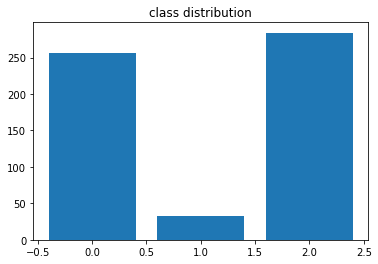

BEGIN: 0
BENIGN_WITHOUT_CALLBACK: 1
MALIGNANT: 2


In [17]:
import matplotlib.pyplot as plt 

plt.bar(list(new_claz_dist.keys()),list(new_claz_dist.values()))
plt.title('class distribution')

plt.show()

##TODO add legend

print('======================')
print('BEGIN:',0)
print('BENIGN_WITHOUT_CALLBACK:',1)
print('MALIGNANT:',2)

print('======================')


# Visualize Image According to classification 

In [18]:
benign_df=filter_df[(filter_df['pathology']=='BENIGN')]
benign_withoutcall_df=filter_df[(filter_df['pathology']=='BENIGN_WITHOUT_CALLBACK')]
malignant_df=filter_df[(filter_df['pathology']=='MALIGNANT')]

BENIGN Dataset
filename: P_01279_LEFT_CC
filename shape: (5491, 2926, 3)
annotation_img: input/y/BENIGN/P_01279_LEFT_CC.jpg
annotation_img shape: (5491, 2926, 3)


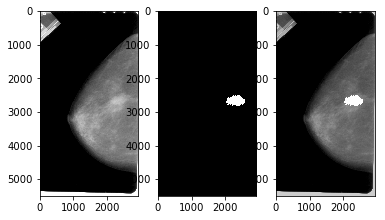

filename: P_01447_RIGHT_CC
filename shape: (5686, 3466, 3)
annotation_img: input/y/BENIGN/P_01447_RIGHT_CC.jpg
annotation_img shape: (5686, 3466, 3)


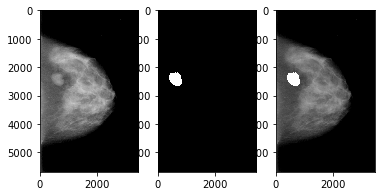

filename: P_01171_LEFT_CC
filename shape: (6196, 3541, 3)
annotation_img: input/y/BENIGN/P_01171_LEFT_CC.jpg
annotation_img shape: (6196, 3541, 3)


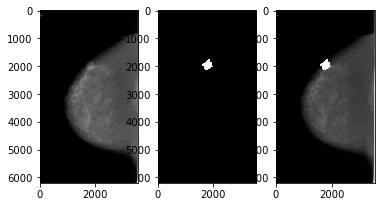

filename: P_01612_LEFT_CC
filename shape: (5266, 2671, 3)
annotation_img: input/y/BENIGN/P_01612_LEFT_CC.jpg
annotation_img shape: (5266, 2671, 3)


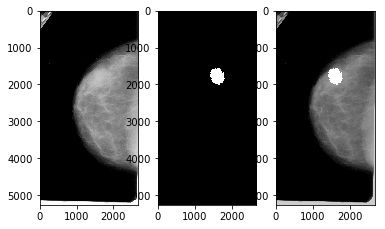

filename: P_00332_RIGHT_CC
filename shape: (4712, 2696, 3)
annotation_img: input/y/BENIGN/P_00332_RIGHT_CC.jpg
annotation_img shape: (4712, 2696, 3)


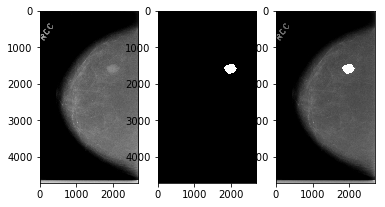

filename: P_01620_RIGHT_CC
filename shape: (4400, 2856, 3)
annotation_img: input/y/BENIGN/P_01620_RIGHT_CC.jpg
annotation_img shape: (4400, 2856, 3)


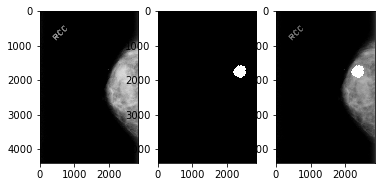

filename: P_00710_LEFT_CC
filename shape: (4696, 3096, 3)
annotation_img: input/y/BENIGN/P_00710_LEFT_CC.jpg
annotation_img shape: (4696, 3096, 3)


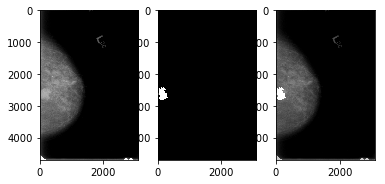

filename: P_00330_LEFT_CC
filename shape: (4516, 2626, 3)
annotation_img: input/y/BENIGN/P_00330_LEFT_CC.jpg
annotation_img shape: (4516, 2626, 3)


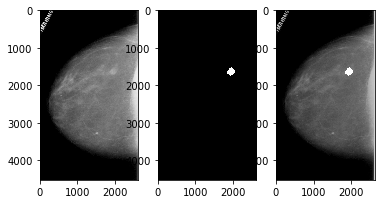

filename: P_01850_RIGHT_CC
filename shape: (6451, 3241, 3)
annotation_img: input/y/BENIGN/P_01850_RIGHT_CC.jpg
annotation_img shape: (6451, 3241, 3)


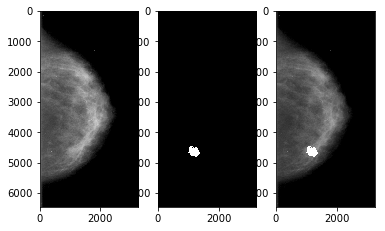

filename: P_00920_RIGHT_CC
filename shape: (5920, 3768, 3)
annotation_img: input/y/BENIGN/P_00920_RIGHT_CC.jpg
annotation_img shape: (5920, 3768, 3)


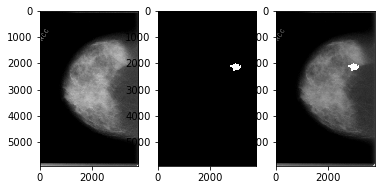

filename: P_00055_LEFT_CC
filename shape: (5386, 3046, 3)
annotation_img: input/y/BENIGN/P_00055_LEFT_CC.jpg
annotation_img shape: (5386, 3046, 3)


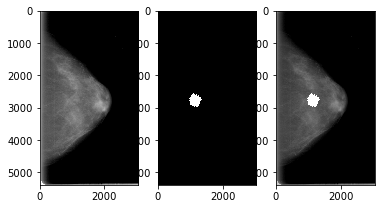

filename: P_00927_LEFT_CC
filename shape: (5191, 3346, 3)
annotation_img: input/y/BENIGN/P_00927_LEFT_CC.jpg
annotation_img shape: (5191, 3346, 3)


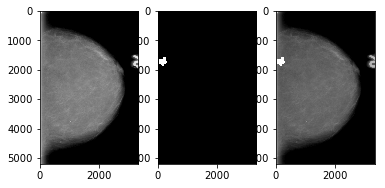

filename: P_01285_RIGHT_CC
filename shape: (4906, 2791, 3)
annotation_img: input/y/BENIGN/P_01285_RIGHT_CC.jpg
annotation_img shape: (4906, 2791, 3)


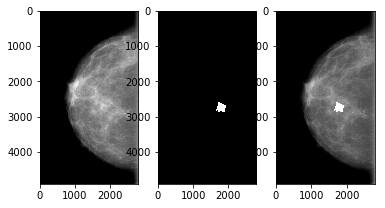

filename: P_00108_LEFT_CC
filename shape: (5386, 3391, 3)
annotation_img: input/y/BENIGN/P_00108_LEFT_CC.jpg
annotation_img shape: (4686, 2951, 3)


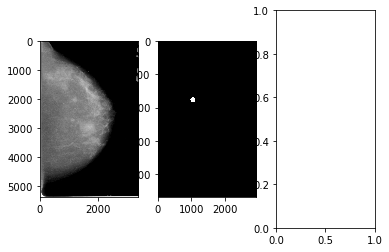


BENIGN Without Callback Dataset
filename: P_01165_LEFT_CC
filename shape: (5491, 2971, 3)
annotation_img: input/y/BENIGN_WITHOUT_CALLBACK/P_01165_LEFT_CC.jpg
annotation_img shape: (5491, 2971, 3)


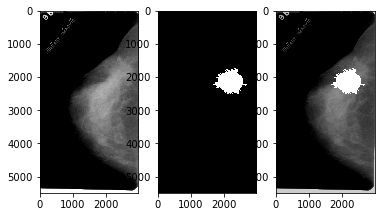

filename: P_01386_LEFT_CC
filename shape: (4536, 2888, 3)
annotation_img: input/y/BENIGN_WITHOUT_CALLBACK/P_01386_LEFT_CC.jpg
annotation_img shape: (4536, 2888, 3)


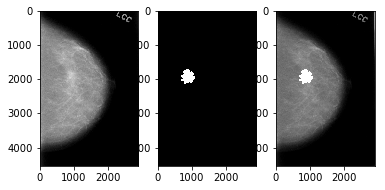


MALIGNANT Dataset
filename: P_00034_RIGHT_CC
filename shape: (6451, 3406, 3)
annotation_img: input/y/MALIGNANT/P_00034_RIGHT_CC.jpg
annotation_img shape: (6451, 3406, 3)


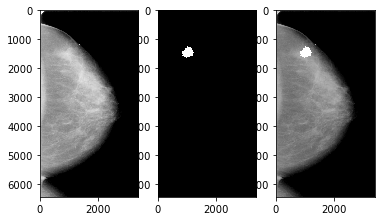

filename: P_00711_LEFT_CC
filename shape: (5760, 3800, 3)
annotation_img: input/y/MALIGNANT/P_00711_LEFT_CC.jpg
annotation_img shape: (5760, 3800, 3)


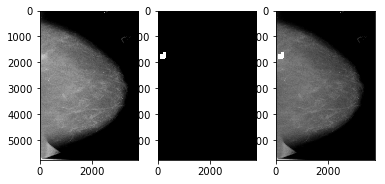

filename: P_01481_RIGHT_CC
filename shape: (5936, 3024, 3)
annotation_img: input/y/MALIGNANT/P_01481_RIGHT_CC.jpg
annotation_img shape: (5936, 3024, 3)


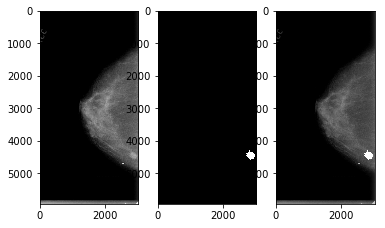

filename: P_00319_LEFT_CC
filename shape: (5491, 3166, 3)
annotation_img: input/y/MALIGNANT/P_00319_LEFT_CC.jpg
annotation_img shape: (5491, 3166, 3)


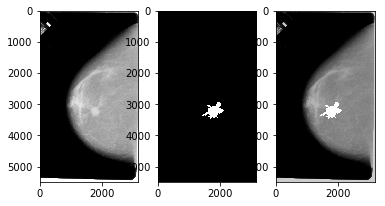

filename: P_00753_RIGHT_CC
filename shape: (4744, 2712, 3)
annotation_img: input/y/MALIGNANT/P_00753_RIGHT_CC.jpg
annotation_img shape: (4744, 2712, 3)


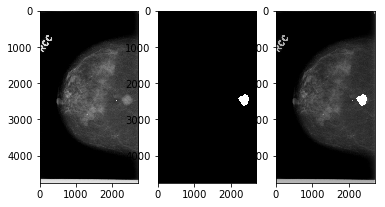

filename: P_00717_RIGHT_CC
filename shape: (6571, 3736, 3)
annotation_img: input/y/MALIGNANT/P_00717_RIGHT_CC.jpg
annotation_img shape: (6571, 3736, 3)


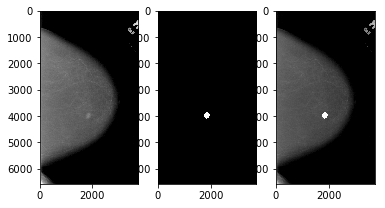

filename: P_01405_RIGHT_CC
filename shape: (4680, 2792, 3)
annotation_img: input/y/MALIGNANT/P_01405_RIGHT_CC.jpg
annotation_img shape: (4680, 2792, 3)


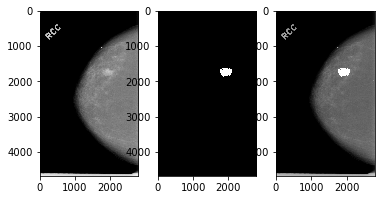

filename: P_00079_RIGHT_CC
filename shape: (4696, 3226, 3)
annotation_img: input/y/MALIGNANT/P_00079_RIGHT_CC.jpg
annotation_img shape: (4696, 3226, 3)


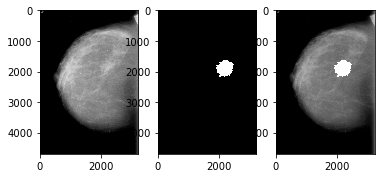

filename: P_01343_LEFT_CC
filename shape: (4776, 3112, 3)
annotation_img: input/y/MALIGNANT/P_01343_LEFT_CC.jpg
annotation_img shape: (4776, 3112, 3)


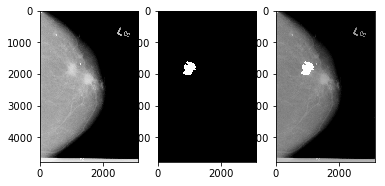

filename: P_00931_LEFT_CC
filename shape: (4381, 2026, 3)
annotation_img: input/y/MALIGNANT/P_00931_LEFT_CC.jpg
annotation_img shape: (4381, 2026, 3)


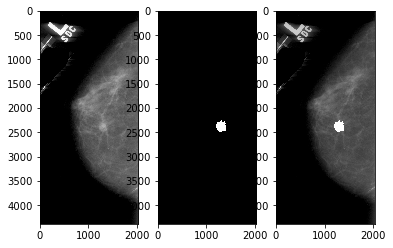

filename: P_00057_RIGHT_CC
filename shape: (4744, 2584, 3)
annotation_img: input/y/MALIGNANT/P_00057_RIGHT_CC.jpg
annotation_img shape: (4744, 2584, 3)


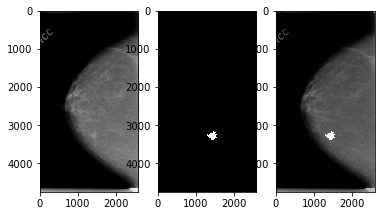

filename: P_00999_LEFT_CC
filename shape: (5992, 3472, 3)
annotation_img: input/y/MALIGNANT/P_00999_LEFT_CC.jpg
annotation_img shape: (5992, 3472, 3)


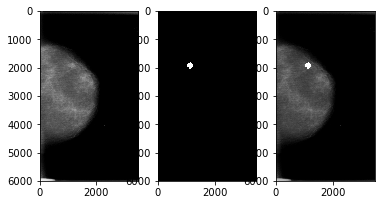

filename: P_00995_LEFT_CC
filename shape: (6481, 3451, 3)
annotation_img: input/y/MALIGNANT/P_00995_LEFT_CC.jpg
annotation_img shape: (6481, 3451, 3)


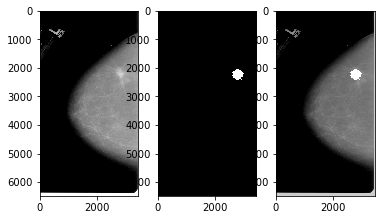

filename: P_01360_LEFT_CC
filename shape: (6601, 3901, 3)
annotation_img: input/y/MALIGNANT/P_01360_LEFT_CC.jpg
annotation_img shape: (6601, 3901, 3)


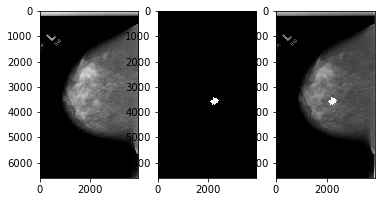

filename: P_00444_LEFT_CC
filename shape: (5146, 2866, 3)
annotation_img: input/y/MALIGNANT/P_00444_LEFT_CC.jpg
annotation_img shape: (5146, 2866, 3)


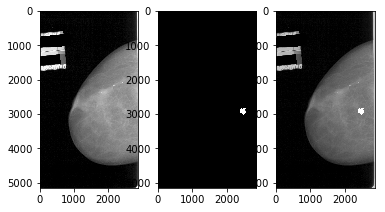

In [27]:
import random
filter_df

sample_df=filter_df.sample(frac=0.03, replace=True)

def visualize_df(sample_df):
    for index, row in sample_df.iterrows():
        # print((row))
        filename= ''+row['patient_id'] +'_'+row['side'] +'_'+row['view']
        origin_img=cv2.imread('input/x/'+id_class.get(filename)+'/'+filename+'.jpg')

        print('filename:',filename)
        print('filename shape:',origin_img.shape)
        plt.subplot(131)
        plt.imshow(origin_img)
        #plt.show()
        plt.subplot(132)
        
        annotation_file='input/y/'+id_class.get(filename)+'/'+filename+'.jpg'
        annotation_img=cv2.imread(annotation_file)
        print('annotation_img:',annotation_file)
        print('annotation_img shape:',annotation_img.shape)
        plt.imshow(annotation_img)
        #plt.show()
        
        plt.subplot(133)
        try:
            combo = cv2.addWeighted(origin_img, 0.8, annotation_img, 1, 0) 
            plt.imshow(combo)
        except:
            pass
        plt.show()
        
print('===========================================')        
print('BENIGN Dataset')
benign_sample_df=benign_df.sample(frac=0.05, replace=True)
visualize_df(benign_sample_df)
print('===========================================')        

print()
print('===========================================')        
print('BENIGN Without Callback Dataset')
benign_withoutcall_sample_df=benign_withoutcall_df.sample(frac=0.05, replace=True)
visualize_df(benign_withoutcall_sample_df)
print('===========================================')        

print()

print('===========================================')        
print('MALIGNANT Dataset')
malignant_sample_df=malignant_df.sample(frac=0.05, replace=True)
visualize_df(malignant_sample_df)
print('===========================================')        
